In [1]:
import pandas as pd

In [2]:
import os 
data = {
    'air_visit_data':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/air_visit_data.csv.zip'),
    'air_store_info':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/air_store_info.csv.zip'),
    'hpg_store_info':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/hpg_store_info.csv.zip'),
    'air_reserve':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/air_reserve.csv.zip'),
    'hpg_reserve':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/hpg_reserve.csv.zip'),
    'store_id_relation':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/store_id_relation.csv.zip'),
    'sample_submission':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/sample_submission.csv.zip'),
    'date_info':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/date_info.csv.zip')
}

In [4]:
data['sample_submission'].head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


* id: air id+YYYY-mm-dd
* visitors: 예상되는 방문자의 수

* 전체기간 예약자와 방문자수 추이
* ~2016년 내 월별 방문자수 -> lineplot, barchart~
* 휴일일때 시간대별 방문자수
* 휴일이 아닐 때 시간대별 방문자수
* ~예약자 수와 실제 방문자 수의 관계~
* genre와 방문자 수의 관계

In [61]:
data['air_visit_data'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [21]:
def split_date_time(df):
    result = df.copy()
    if 'visit_datetime' in result.columns:
        result.loc[:,'visit_datetime'] = pd.to_datetime(result['visit_datetime'])
        result.loc[:,'visit_date']  = [str(d.date()) for d in result['visit_datetime']]       
        result.loc[:,'visit_time']  = [str(d.time()) for d in result['visit_datetime']]       
    if 'reserve_datetime' in df.columns:
        result.loc[:,'reserve_datetime'] = pd.to_datetime(result['reserve_datetime'])
        result.loc[:,'reserve_date']  = [str(d.date()) for d in result['reserve_datetime']]       
        result.loc[:,'reserve_time']  = [str(d.time()) for d in result['reserve_datetime']]
        
    if 'visit_date' in result.columns:
        result = pd.merge(result, data['date_info'], how='inner', left_on='visit_date', right_on='calendar_date')
    if 'reserve_date' in result.columns:
        result = pd.merge(result,data['date_info'],how='inner', left_on='reserve_date', right_on='calendar_date')
    return result

# 2016년도 방문자 수

In [66]:
air_visit_group = split_date_time(data['air_visit_data'])
air_visit_group.loc[:,'visit_date'] = pd.to_datetime(air_visit_group['visit_date'])
air_visit_group['visit_year'] = pd.Series(air_visit_group.visit_date.dt.year)
air_visit_group['visit_month']  = pd.Series(air_visit_group.visit_date.dt.month)
air_visit_group['visit_day'] = pd.Series(air_visit_group.visit_date.dt.day)

In [69]:
air_visit_group

,air_store_id,visit_date,visitors,calendar_date,day_of_week,holiday_flg,visit_year,visit_month,visit_day
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,2016,1,13
1,air_25e9888d30b386df,2016-01-13,21,2016-01-13,Wednesday,0,2016,1,13
2,air_fd6aac1043520e83,2016-01-13,40,2016-01-13,Wednesday,0,2016,1,13
3,air_64d4491ad8cdb1c6,2016-01-13,5,2016-01-13,Wednesday,0,2016,1,13
4,air_ee3a01f0c71a769f,2016-01-13,18,2016-01-13,Wednesday,0,2016,1,13
...,...,...,...,...,...,...,...,...,...
252103,air_dfad598ff642dab7,2016-01-02,25,2016-01-02,Saturday,1,2016,1,2
252104,air_db4b38ebe7a7ceff,2016-01-02,9,2016-01-02,Saturday,1,2016,1,2
252105,air_232dcee6f7c51d37,2016-01-02,9,2016-01-02,Saturday,1,2016,1,2
252106,air_3b6438b125086430,2016-01-02,8,2016-01-02,Saturday,1,2016,1,2


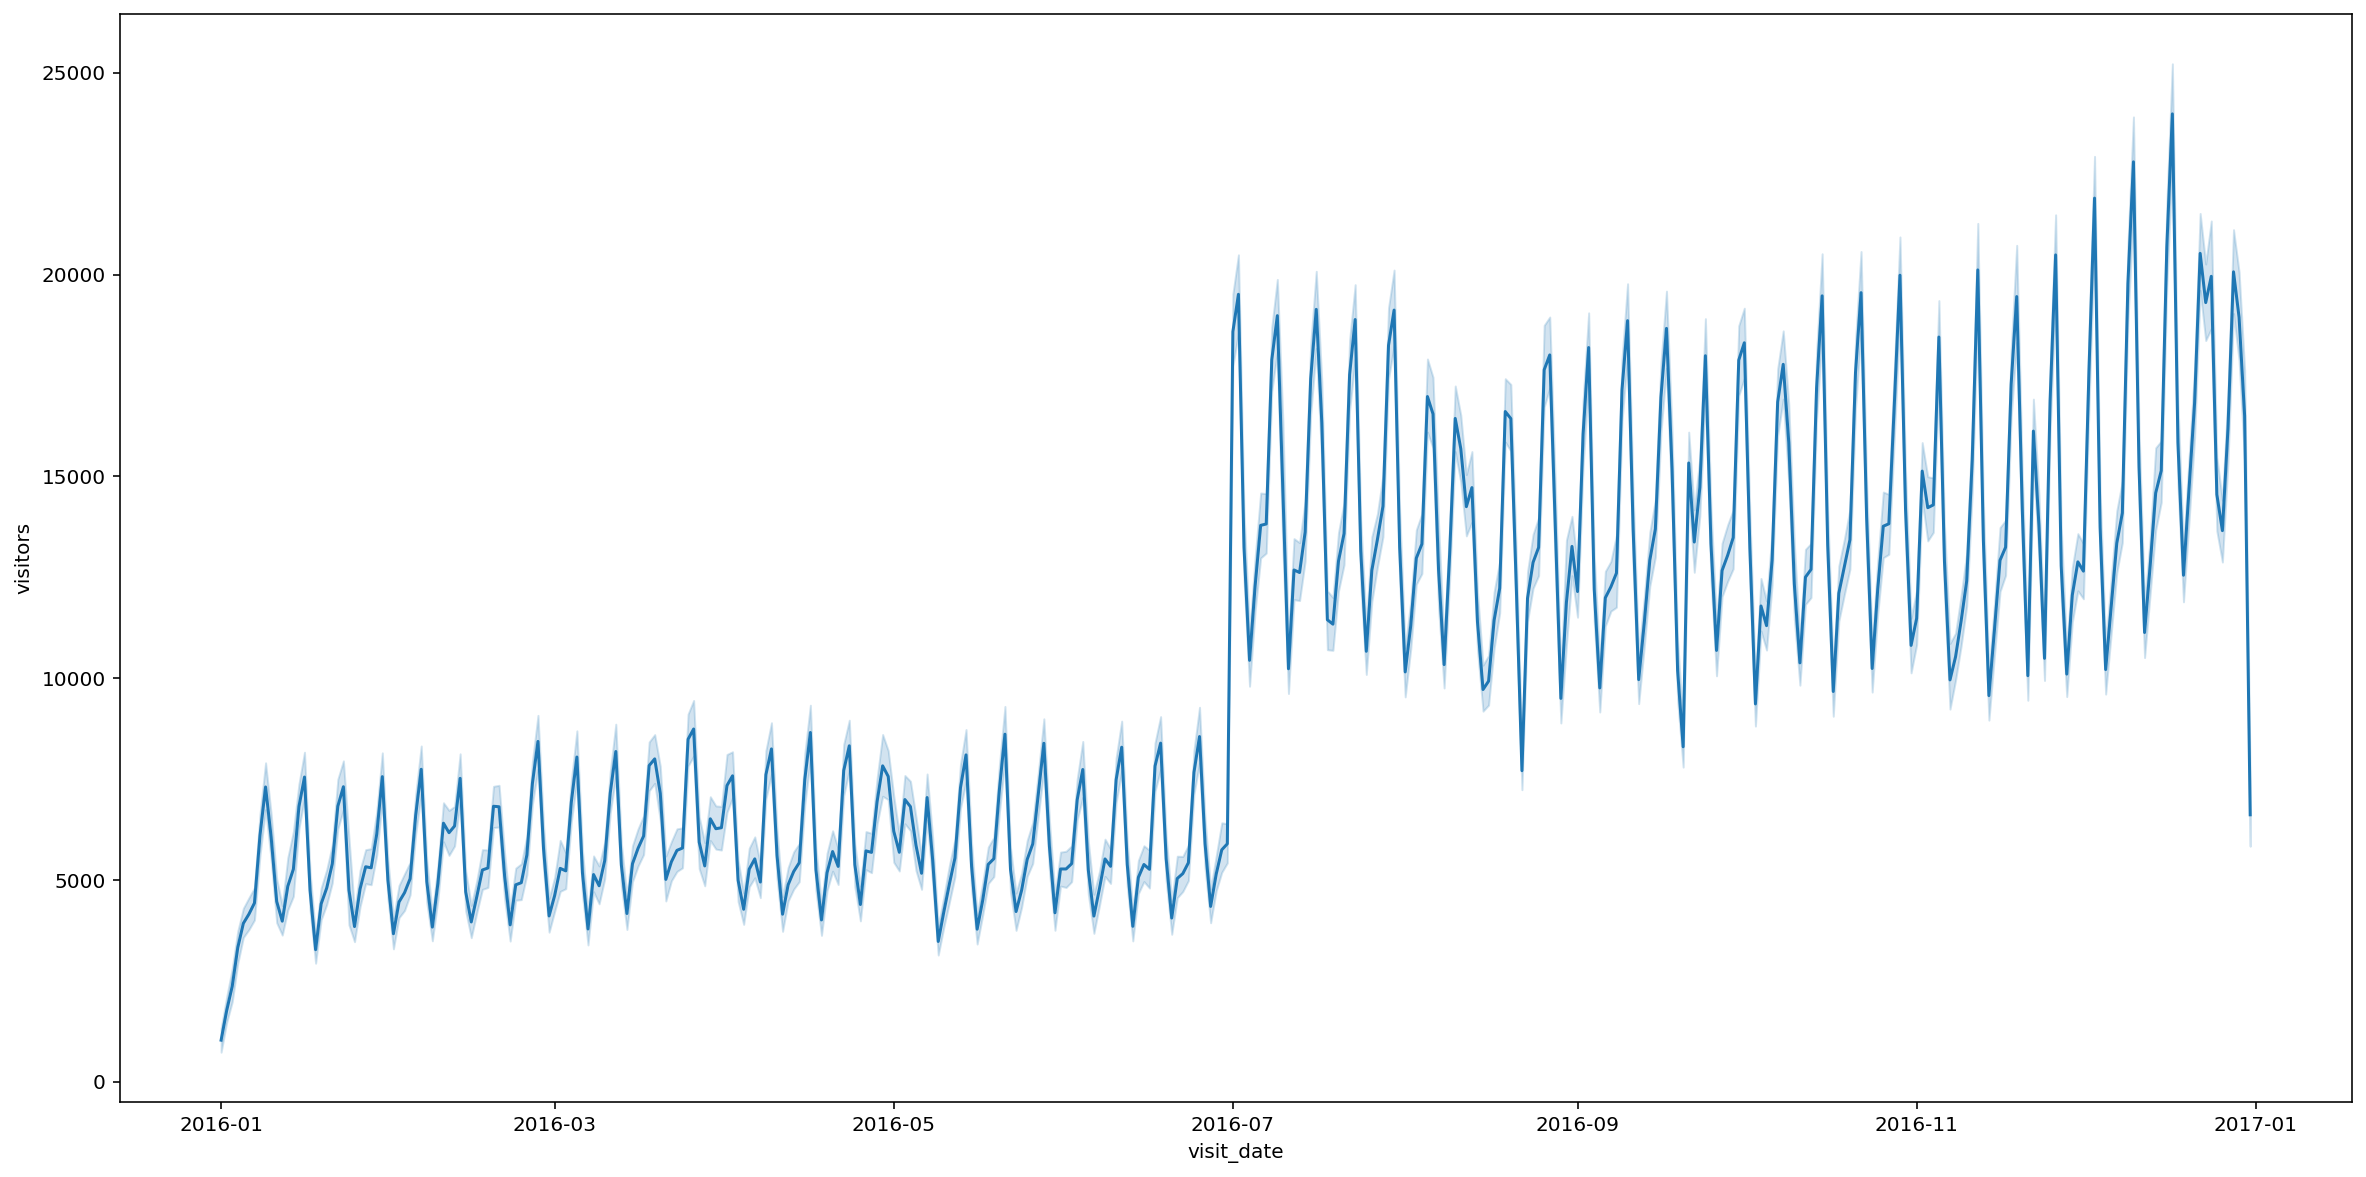

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(data = air_visit_group[air_visit_group.visit_year==2016], x='visit_date', y='visitors', estimator=sum)
plt.show()

시각화를 통해 2016년도에는 연말로 갈 수록 방문수가 많아지는 것을 볼 수 있다.    
그래프에 패턴이 보여서 확인하고자 자세히 추이를 확인하고자 한다.

### 1월 한달에 대한 시각화

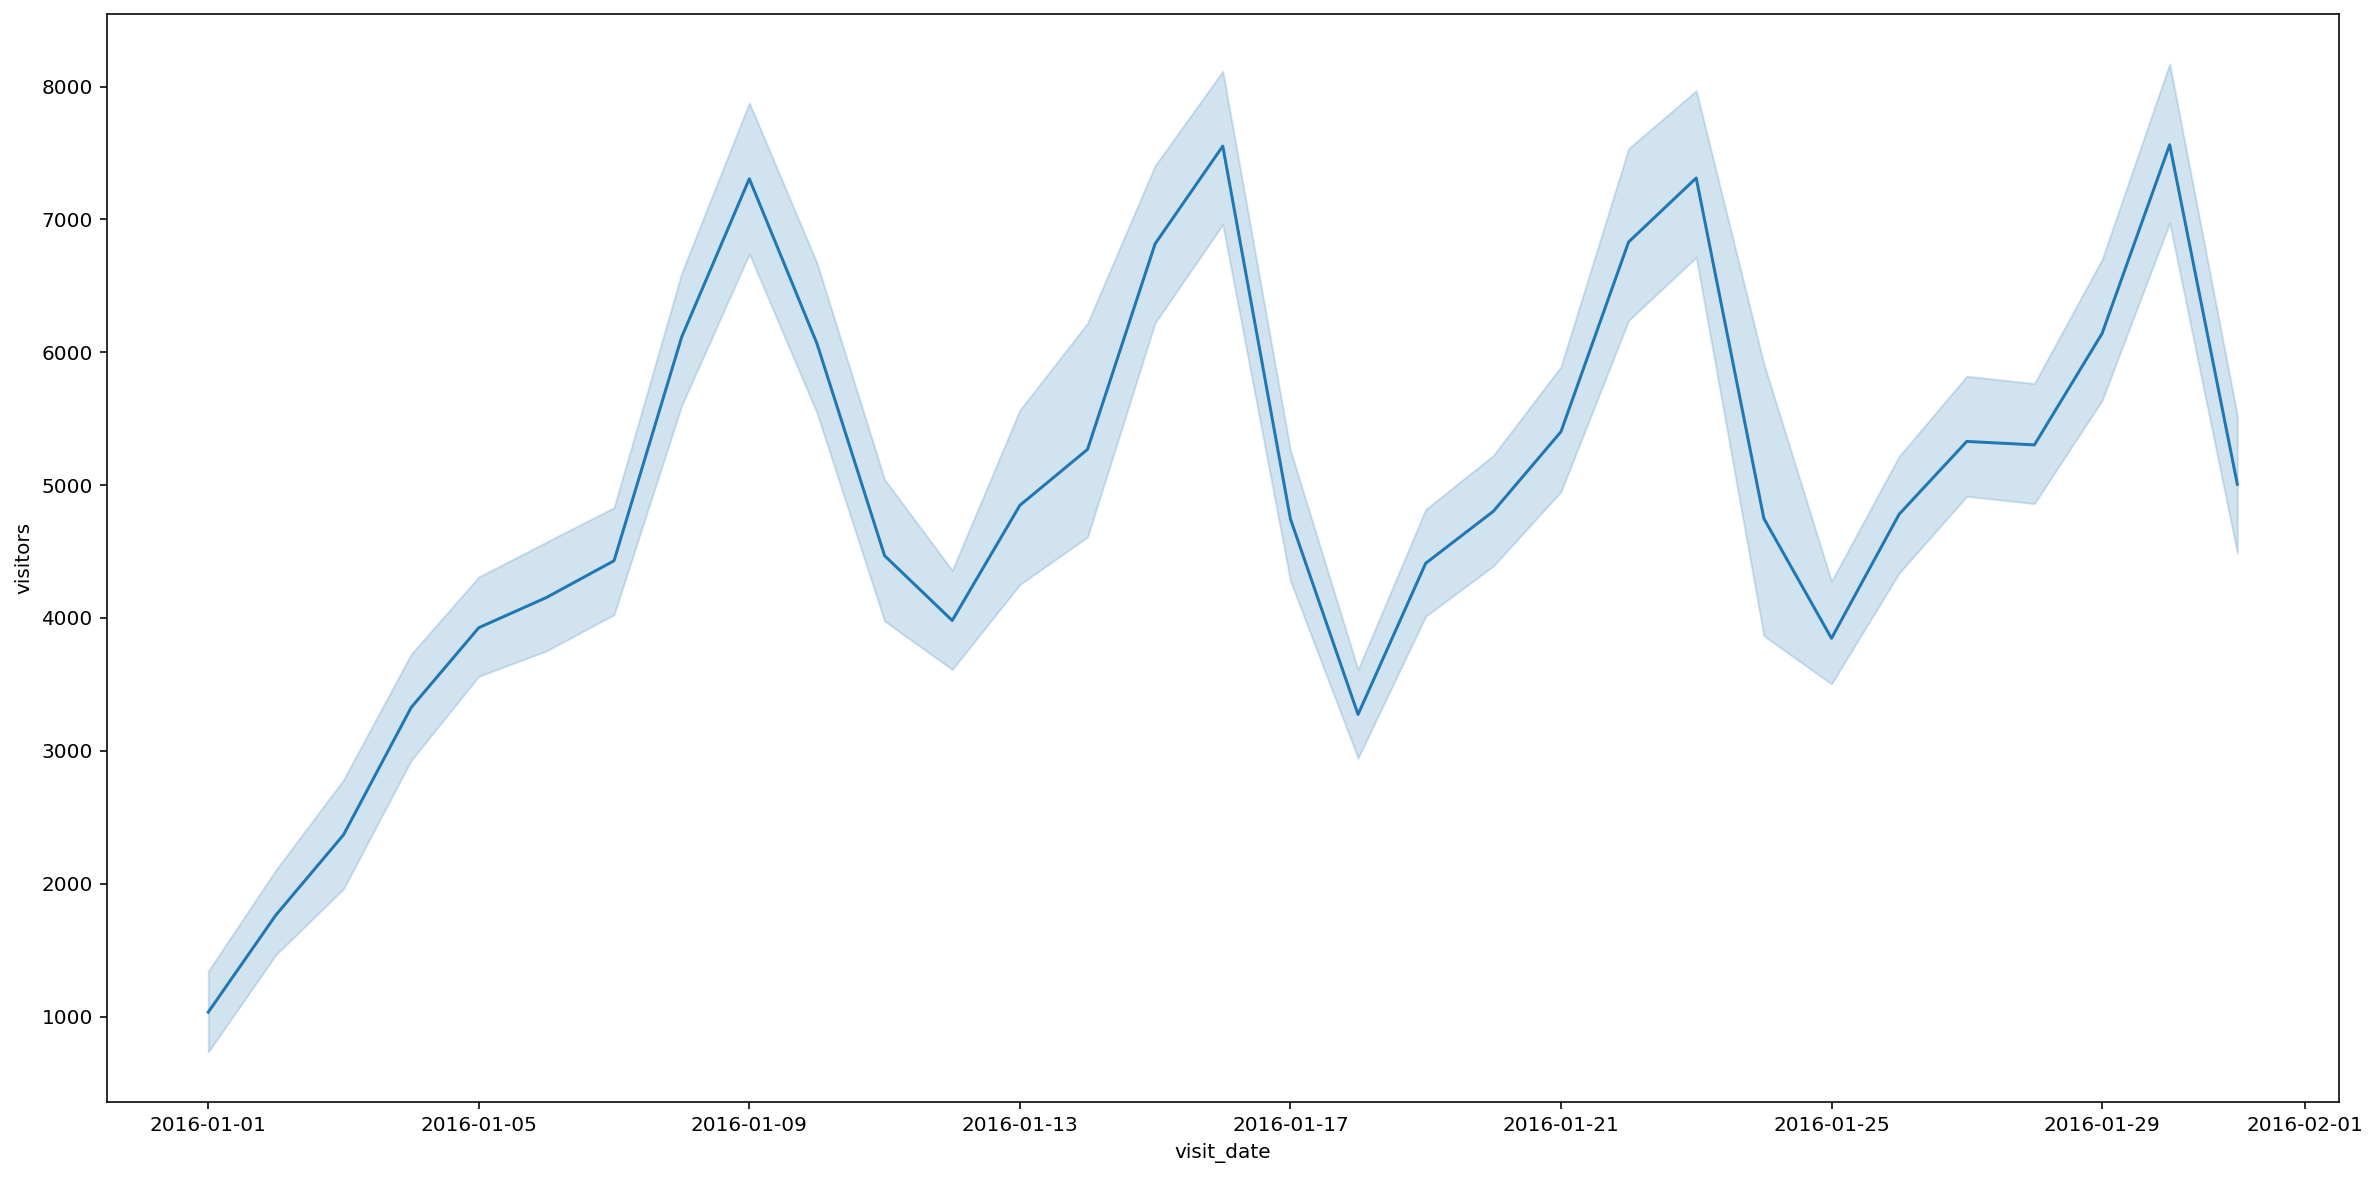

In [160]:
plt.figure(figsize=(20,10))
sns.lineplot(data = air_visit_group.loc[(air_visit_group['visit_year'] == 2016) & (air_visit_group['visit_month'] == 1)], x='visit_date', y='visitors', estimator=sum)
plt.show()

### 1주에 대한 시각화

In [189]:
import datetime
start_date = list(air_visit_group[air_visit_group['day_of_week']=='Monday'].visit_date)[0]


temp_data = air_visit_group.loc[(air_visit_group['visit_date'] >= start_date) 
                             & (air_visit_group['visit_date'] <= start_date + datetime.timedelta(days=7))]
temp_data

,air_store_id,visit_date,visitors,calendar_date,day_of_week,holiday_flg,visit_year,visit_month,visit_day
1109,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,2016,1,18
1110,air_fd6aac1043520e83,2016-01-18,12,2016-01-18,Monday,0,2016,1,18
1111,air_64d4491ad8cdb1c6,2016-01-18,6,2016-01-18,Monday,0,2016,1,18
1112,air_ee3a01f0c71a769f,2016-01-18,14,2016-01-18,Monday,0,2016,1,18
1113,air_d0e8a085d8dc83aa,2016-01-18,9,2016-01-18,Monday,0,2016,1,18
...,...,...,...,...,...,...,...,...,...
220566,air_506fe758114df773,2016-01-24,25,2016-01-24,Sunday,0,2016,1,24
220567,air_1d1e8860ae04f8e9,2016-01-24,10,2016-01-24,Sunday,0,2016,1,24
220568,air_0e1eae99b8723bc1,2016-01-24,16,2016-01-24,Sunday,0,2016,1,24
220569,air_7bc6ca04d7b0f3b8,2016-01-24,11,2016-01-24,Sunday,0,2016,1,24


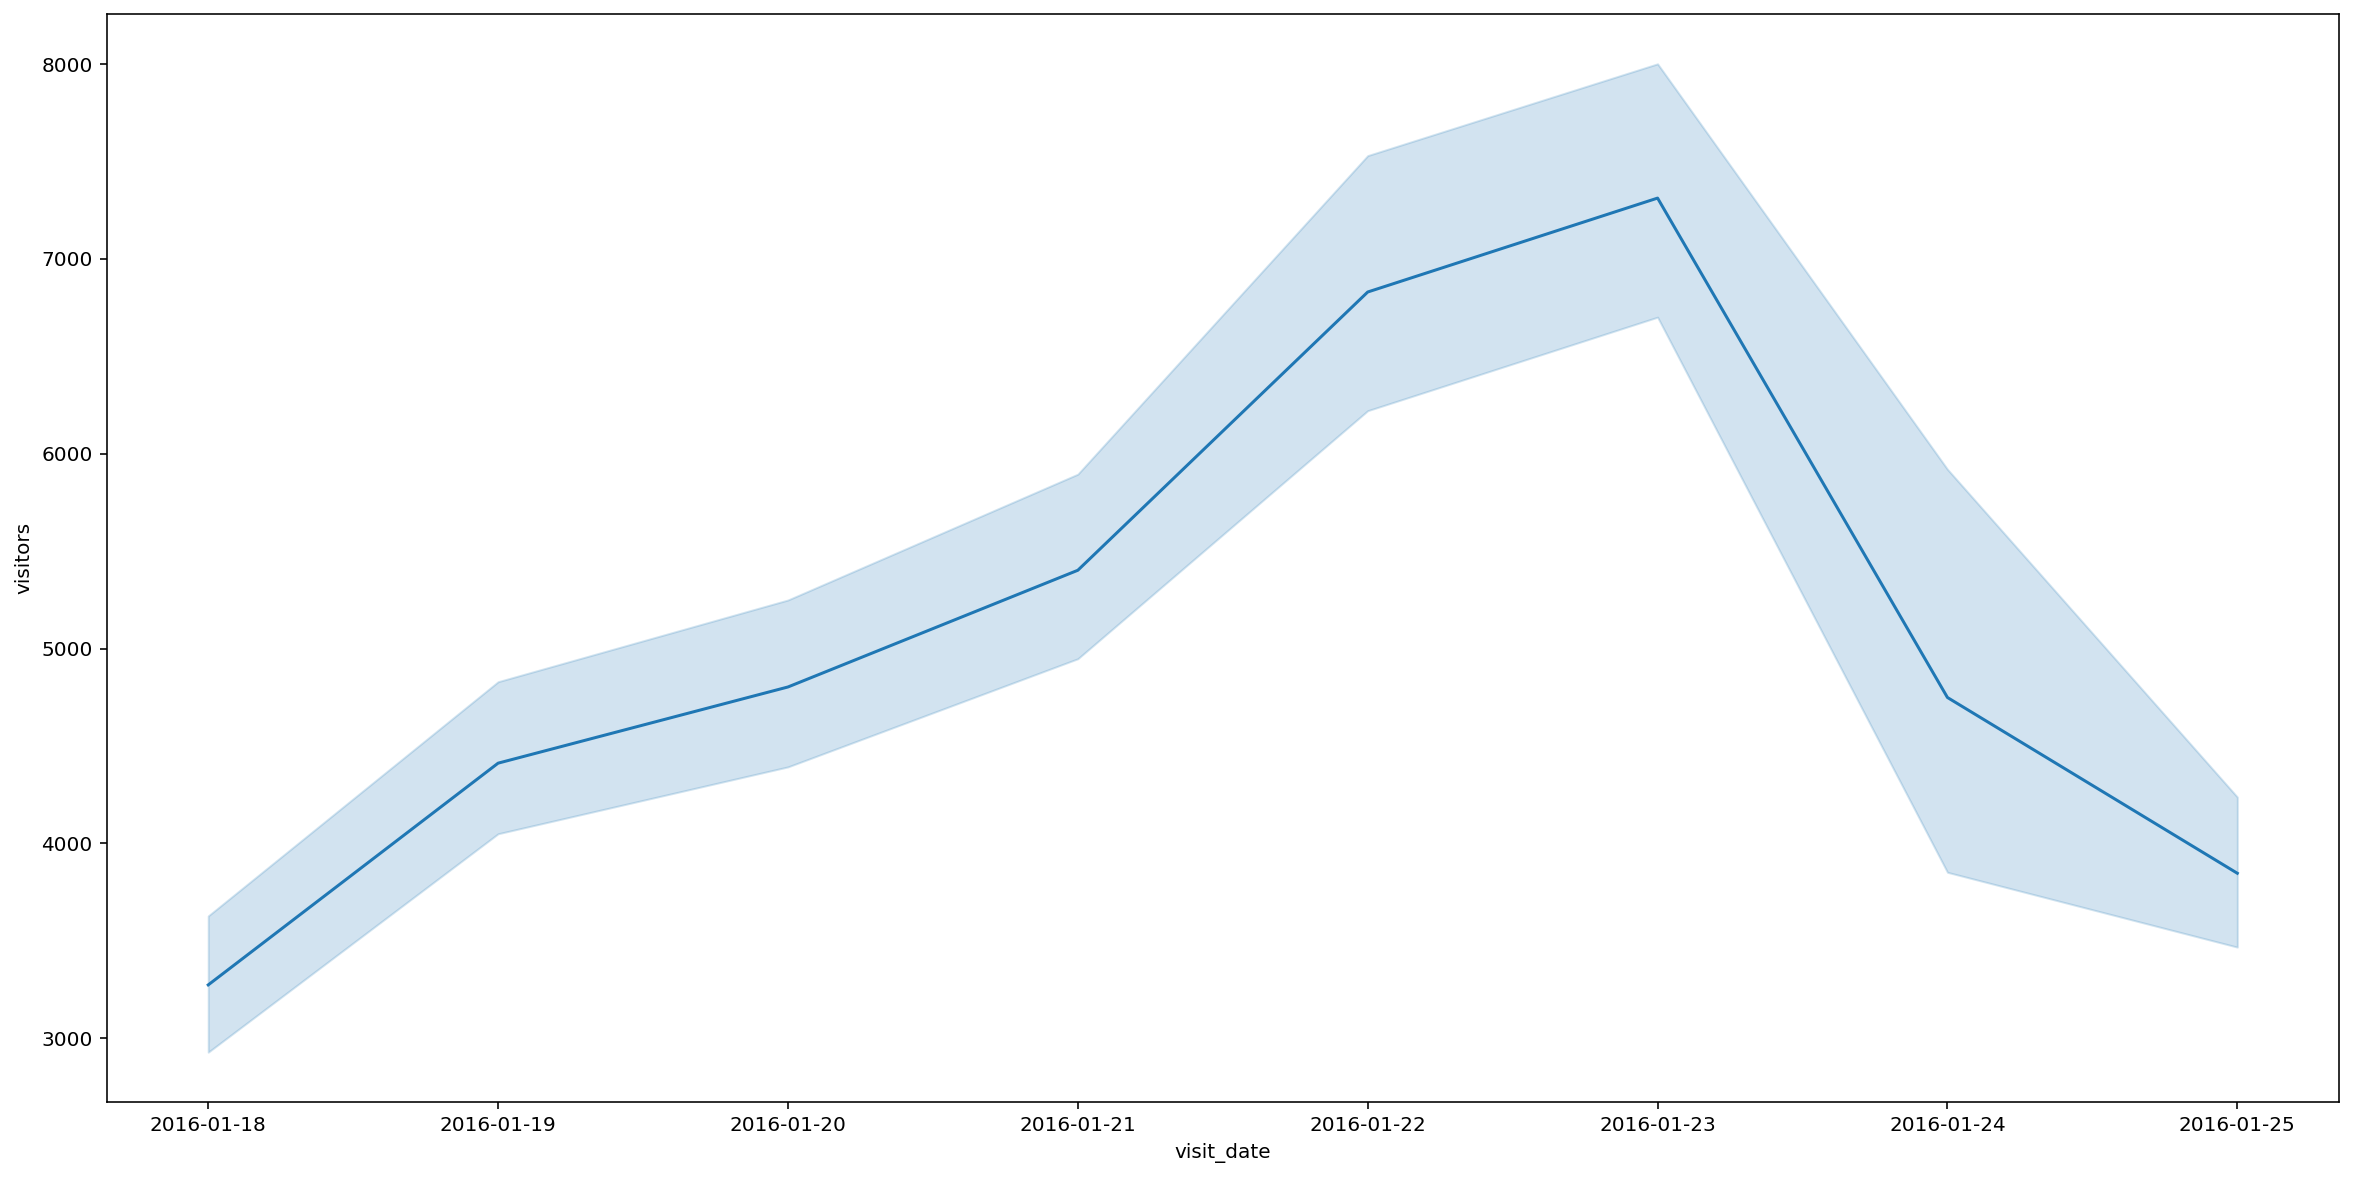

In [190]:
plt.figure(figsize=(20,10))
sns.lineplot(data = temp_data, x='visit_date', y='visitors', estimator=sum)
plt.show()

### 요일별 시각화
위에 한주에 대한 라인그래프와 모양이 유사한 것을 찾을 수 있었다.    
토요일이 제일 많고, 월요일이 제일 적다.

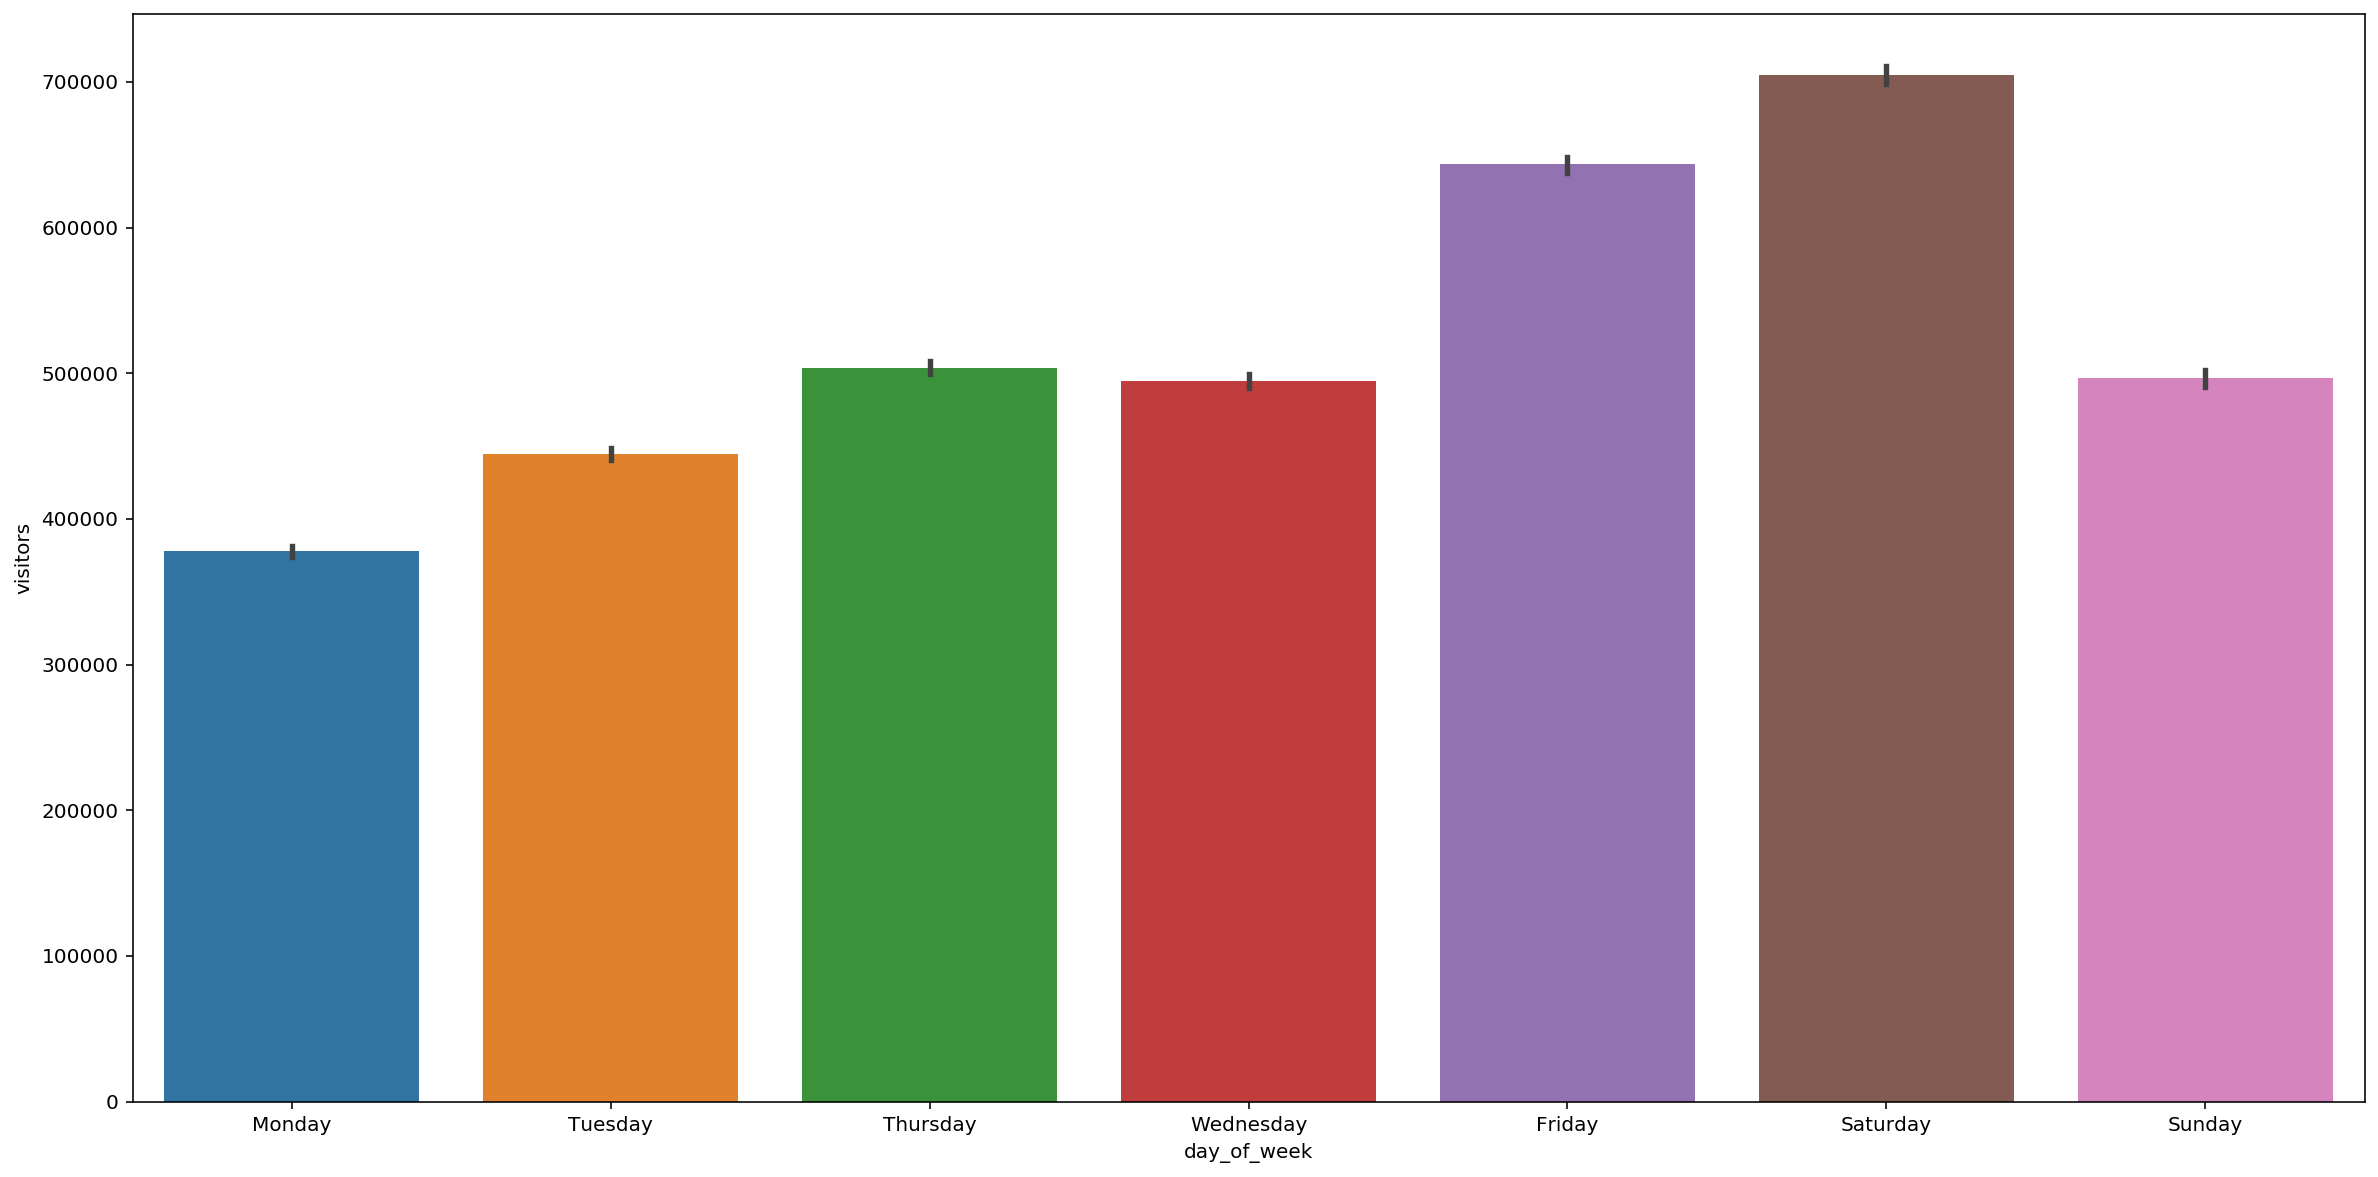

In [100]:
m = ['Monday', 'Tuesday', 'Thursday', 'Wednesday','Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20,10))
sns.barplot(data = air_visit_group[air_visit_group.visit_year==2016], x='day_of_week', y='visitors', estimator=sum, order=m)
plt.show()

### 2016년도 월별 시각화
2016년도 월별로 방문객 수를 시각화했을 때 7월부터 12월까지 상대적으로 많은 방문객이 찾았다는 것을 알 수 있다.

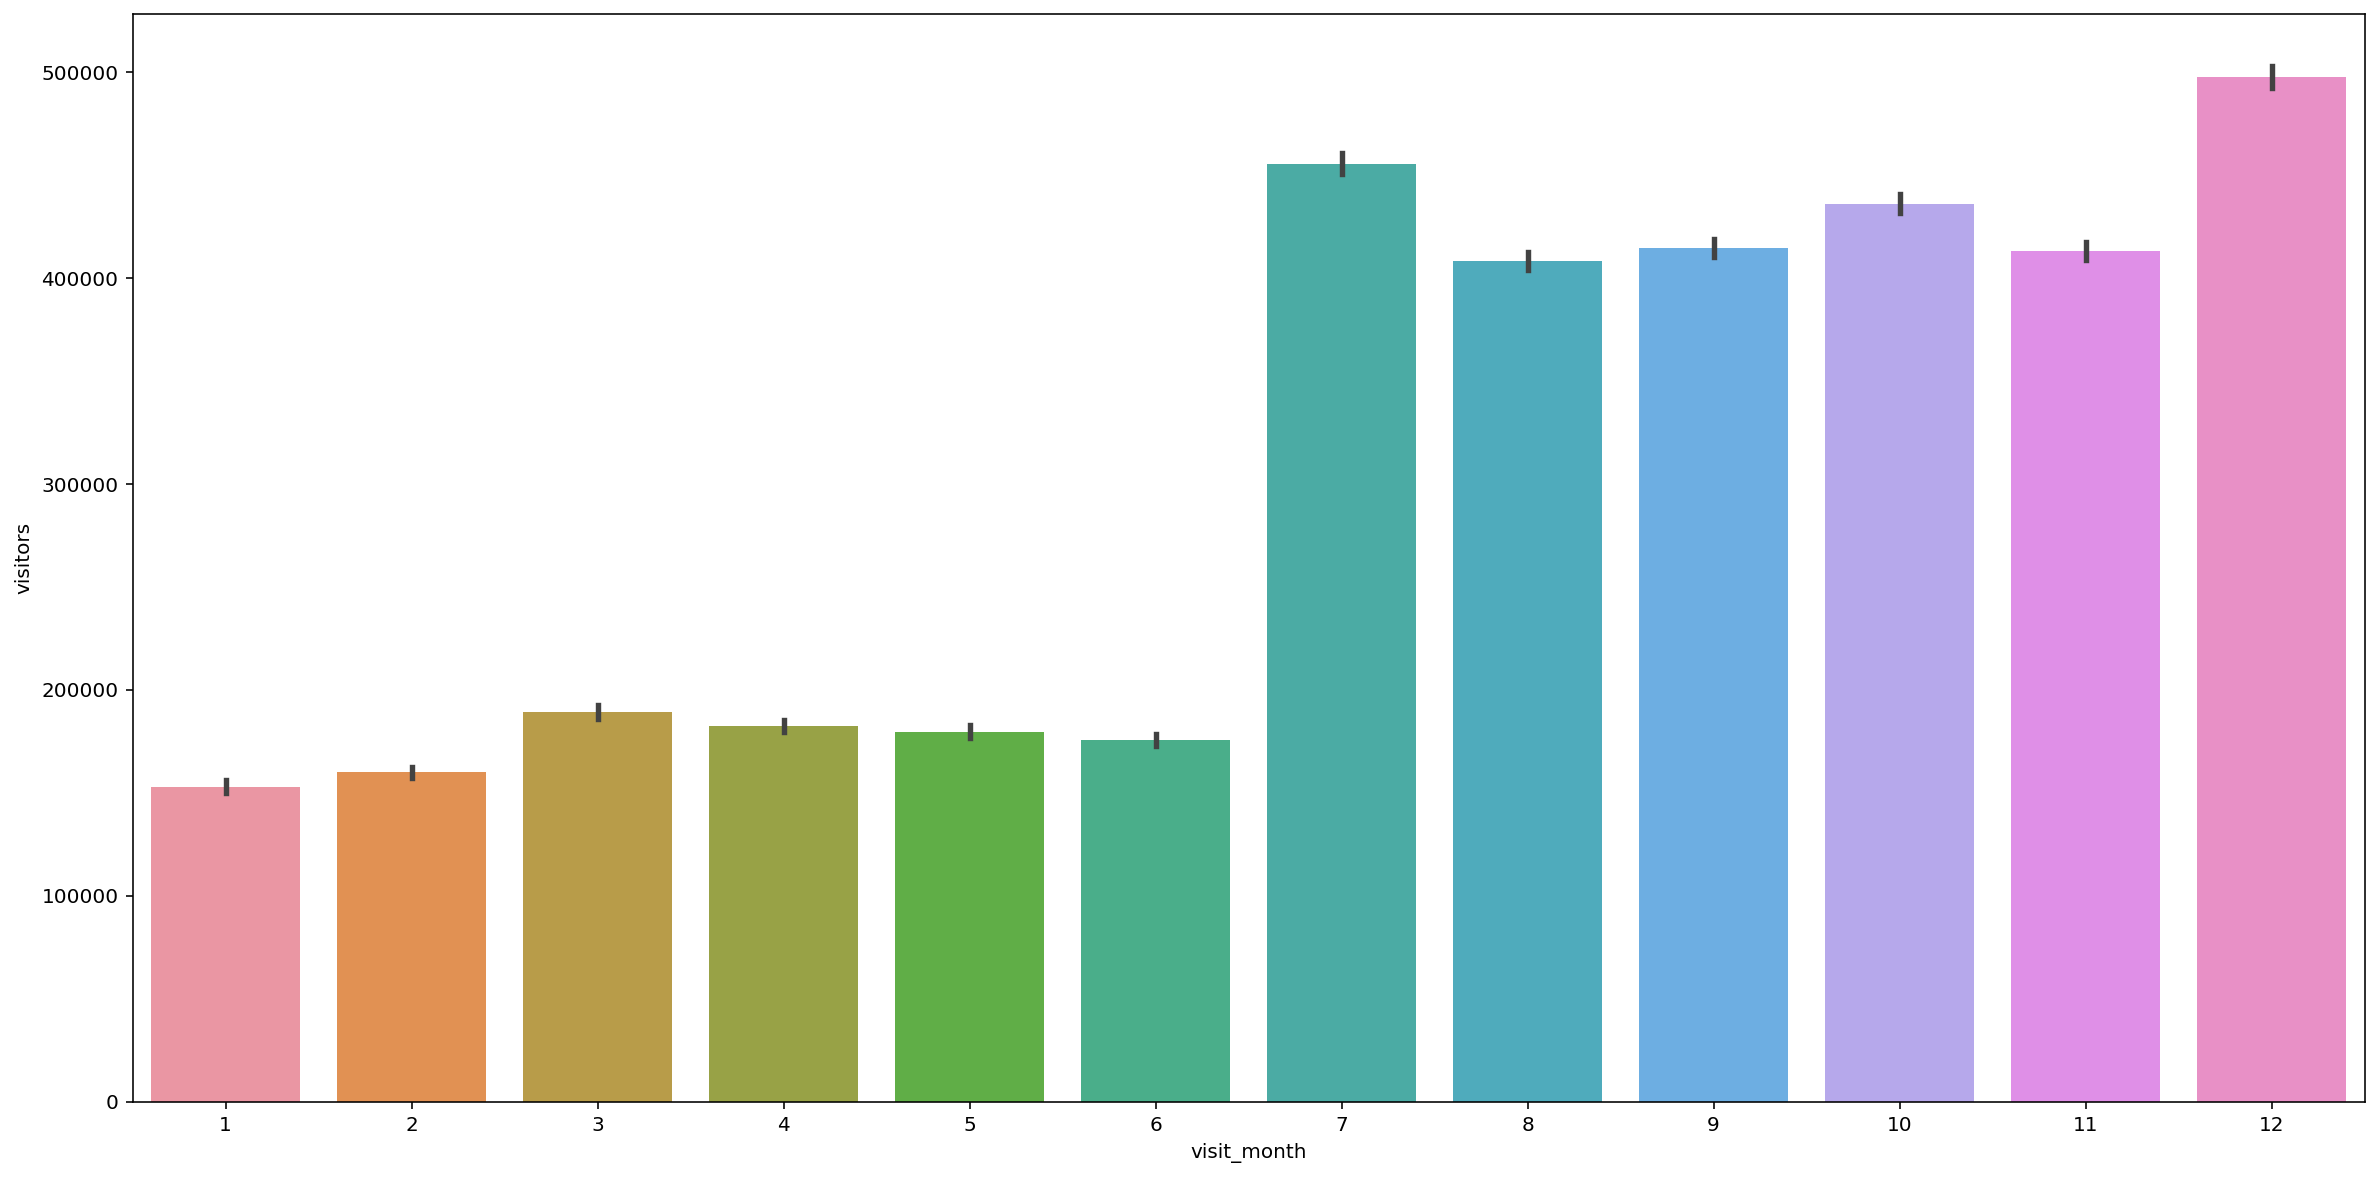

In [101]:
plt.figure(figsize=(20,10))
sns.barplot(data = air_visit_group[air_visit_group.visit_year==2016], x='visit_month', y='visitors', estimator=sum)
plt.show()

# 2016년도 air 예약자 수

In [102]:
data['air_reserve'].head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [109]:
air_reserve_group = split_date_time(data['air_reserve'])
air_reserve_group.loc[:,'visit_date'] = pd.to_datetime(air_reserve_group['visit_date'])
air_reserve_group['visit_year'] = pd.Series(air_reserve_group.visit_date.dt.year)
air_reserve_group['visit_month']  = pd.Series(air_reserve_group.visit_date.dt.month)
air_reserve_group['visit_day'] = pd.Series(air_reserve_group.visit_date.dt.day)
air_reserve_group

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_time,reserve_date,reserve_time,calendar_date_x,day_of_week_x,holiday_flg_x,calendar_date_y,day_of_week_y,holiday_flg_y,visit_year,visit_month,visit_day
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,19:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,19:00:00,2016-01-01,19:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,19:00:00,2016-01-01,19:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,20:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,20:00:00,2016-01-01,01:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92373,air_683371d9baabf410,2017-05-23 12:00:00,2017-04-22 11:00:00,5,2017-05-23,12:00:00,2017-04-22,11:00:00,2017-05-23,Tuesday,0,2017-04-22,Saturday,0,2017,5,23
92374,air_df554c4527a1cfe6,2017-05-27 19:00:00,2017-04-22 20:00:00,6,2017-05-27,19:00:00,2017-04-22,20:00:00,2017-05-27,Saturday,0,2017-04-22,Saturday,0,2017,5,27
92375,air_683371d9baabf410,2017-05-28 11:00:00,2017-04-22 11:00:00,6,2017-05-28,11:00:00,2017-04-22,11:00:00,2017-05-28,Sunday,0,2017-04-22,Saturday,0,2017,5,28
92376,air_f911308e19d64236,2017-05-28 12:00:00,2017-04-22 15:00:00,6,2017-05-28,12:00:00,2017-04-22,15:00:00,2017-05-28,Sunday,0,2017-04-22,Saturday,0,2017,5,28


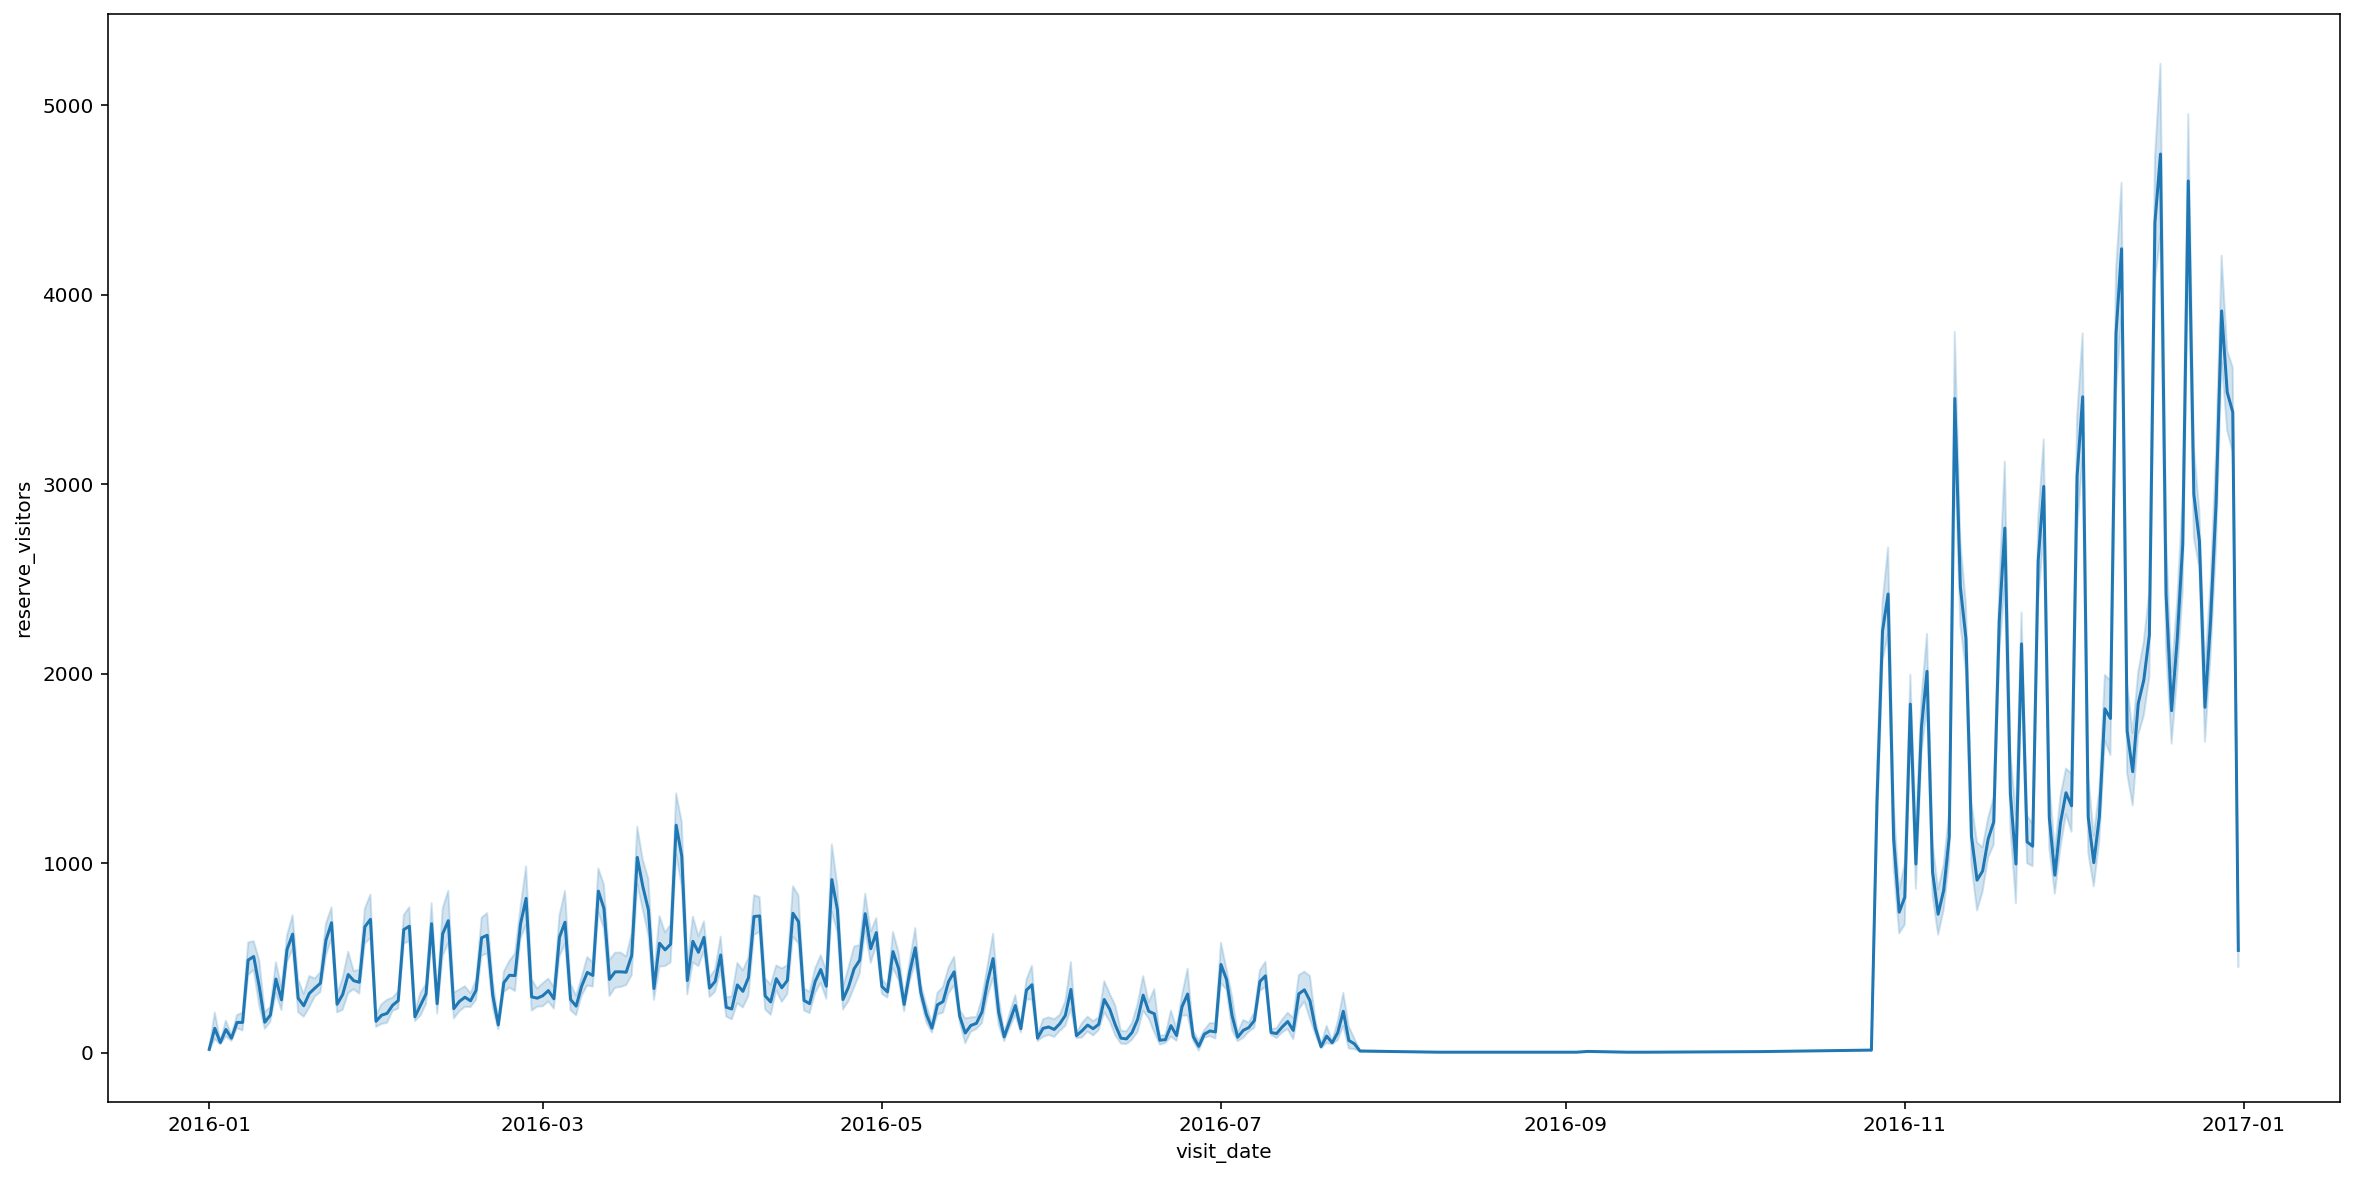

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(data = air_reserve_group[air_reserve_group.visit_year==2016], x='visit_date', y='reserve_visitors', estimator=sum)
plt.show()

# 2016년도 실제 방문자와 예약자의 비교(air)

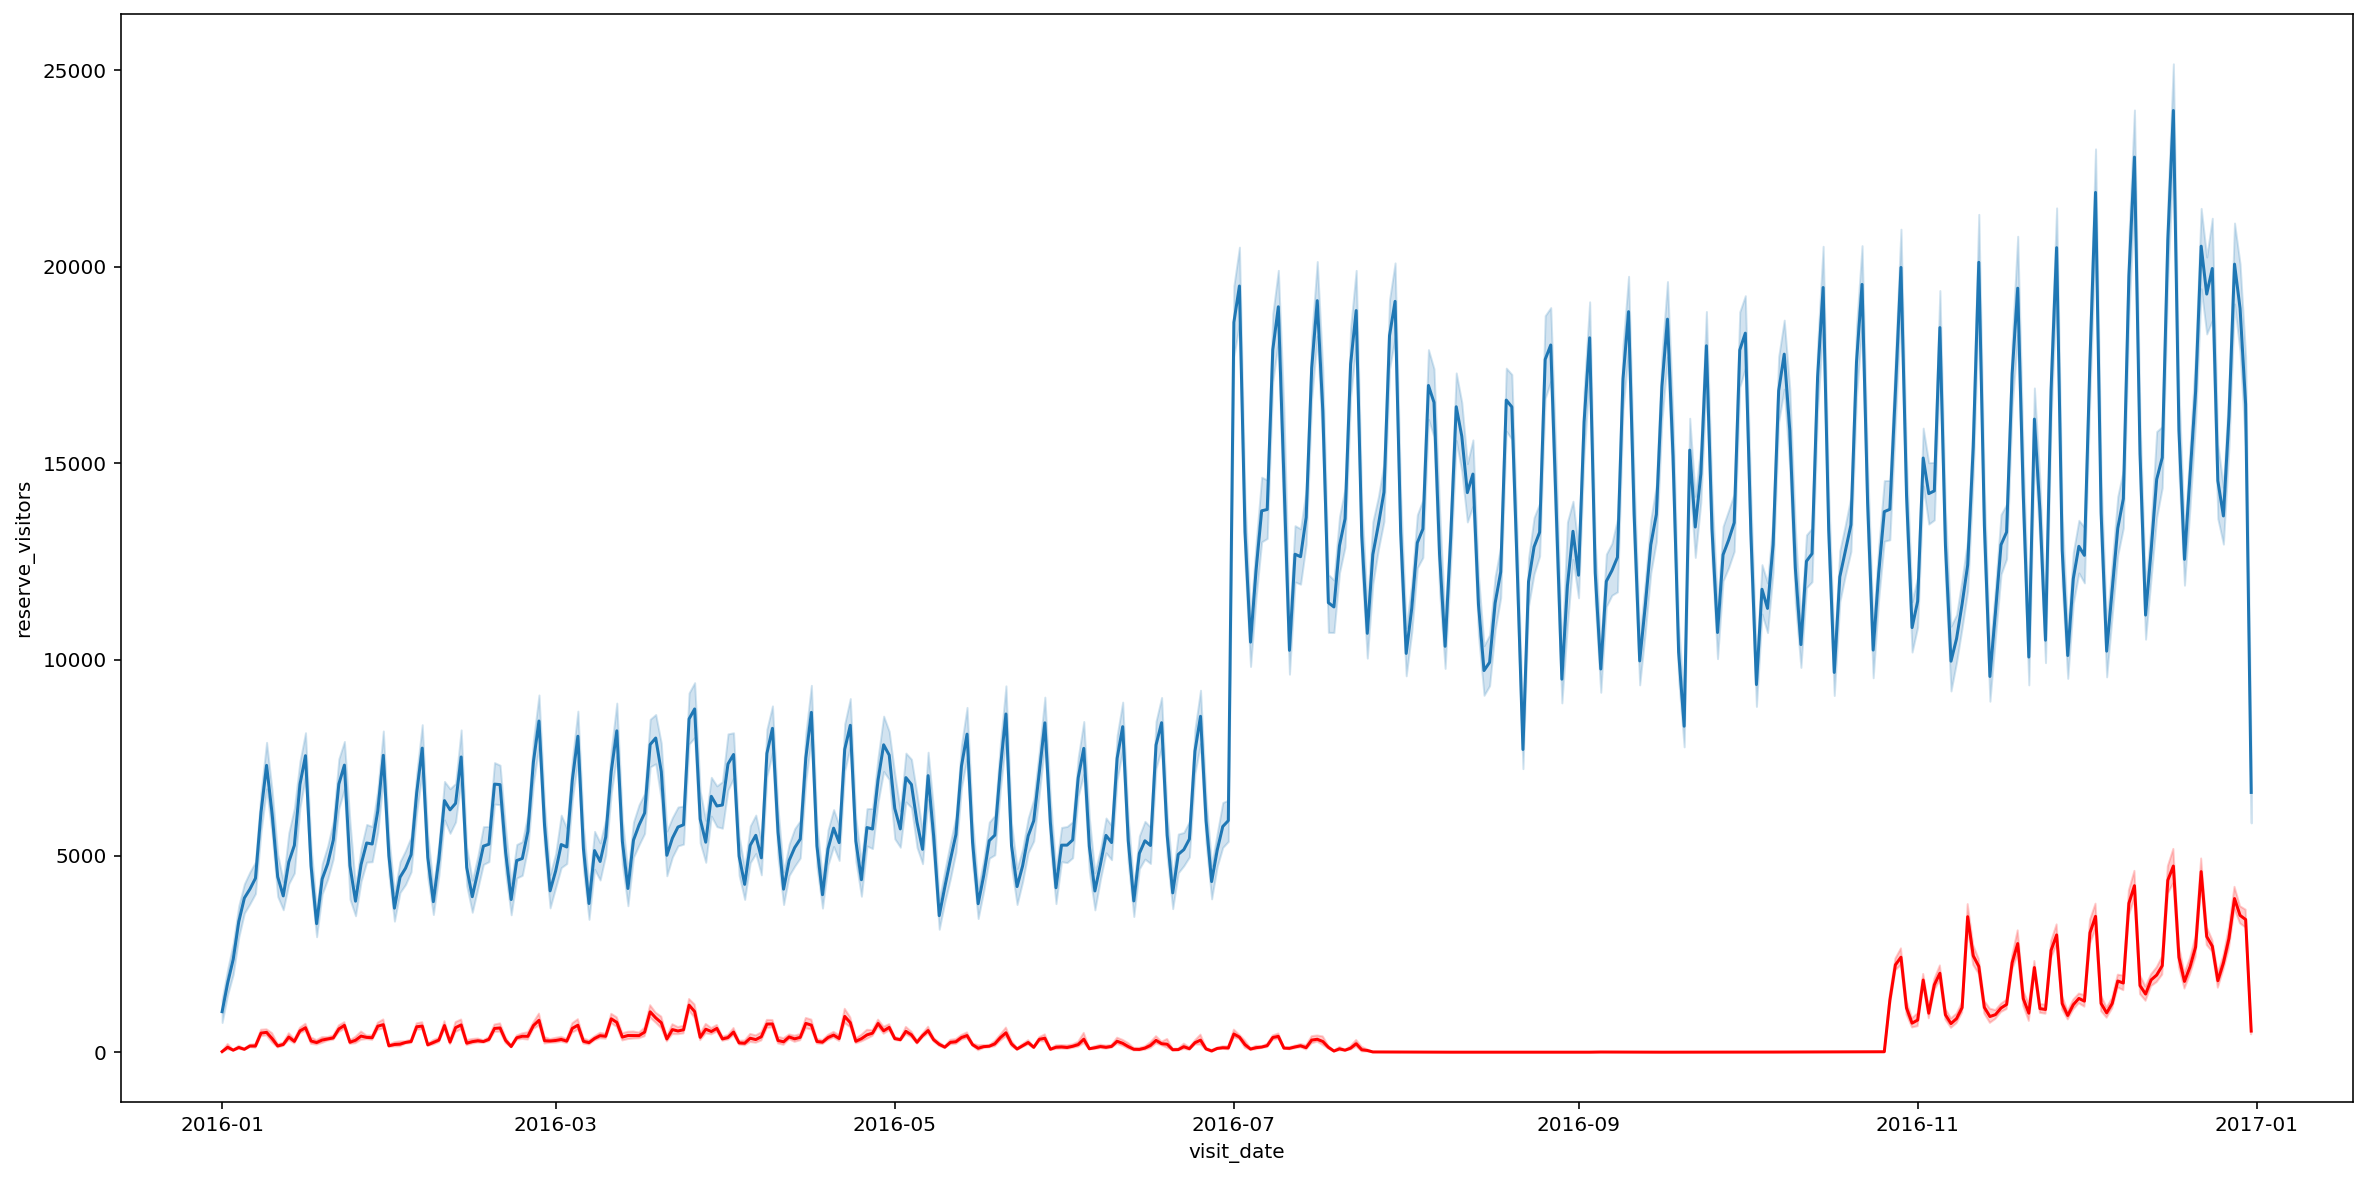

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(data = air_visit_group[air_visit_group.visit_year==2016], x='visit_date', y='visitors', estimator=sum)
sns.lineplot(data = air_reserve_group[air_reserve_group.visit_year==2016], x='visit_date', y='reserve_visitors', estimator=sum, color='r')
plt.show()

# 2016년도 hpg 예약자 수

In [123]:
hpg_reserve_df = split_date_time(data['hpg_reserve'])
hpg_reserve_df.loc[:,'visit_date'] = pd.to_datetime(hpg_reserve_df['visit_date'])
hpg_reserve_df['visit_year'] = pd.Series(hpg_reserve_df.visit_date.dt.year)
hpg_reserve_df['visit_month']  = pd.Series(hpg_reserve_df.visit_date.dt.month)
hpg_reserve_df['visit_day'] = pd.Series(hpg_reserve_df.visit_date.dt.day)
hpg_reserve_df

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_time,reserve_date,reserve_time,calendar_date_x,day_of_week_x,holiday_flg_x,calendar_date_y,day_of_week_y,holiday_flg_y,visit_year,visit_month,visit_day
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016-01-01,11:00:00,2016-01-01,09:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016-01-01,13:00:00,2016-01-01,06:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016-01-01,16:00:00,2016-01-01,14:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016-01-01,17:00:00,2016-01-01,11:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016-01-01,17:00:00,2016-01-01,03:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000315,hpg_4f9a0512035a283c,2017-05-28 20:00:00,2017-04-22 02:00:00,7,2017-05-28,20:00:00,2017-04-22,02:00:00,2017-05-28,Sunday,0,2017-04-22,Saturday,0,2017,5,28
2000316,hpg_9850103fb67fca18,2017-05-29 11:00:00,2017-04-22 11:00:00,3,2017-05-29,11:00:00,2017-04-22,11:00:00,2017-05-29,Monday,0,2017-04-22,Saturday,0,2017,5,29
2000317,hpg_c1930691cac69a15,2017-05-29 18:00:00,2017-04-22 13:00:00,5,2017-05-29,18:00:00,2017-04-22,13:00:00,2017-05-29,Monday,0,2017-04-22,Saturday,0,2017,5,29
2000318,hpg_b2be1db5876b80ac,2017-05-29 19:00:00,2017-04-22 19:00:00,4,2017-05-29,19:00:00,2017-04-22,19:00:00,2017-05-29,Monday,0,2017-04-22,Saturday,0,2017,5,29


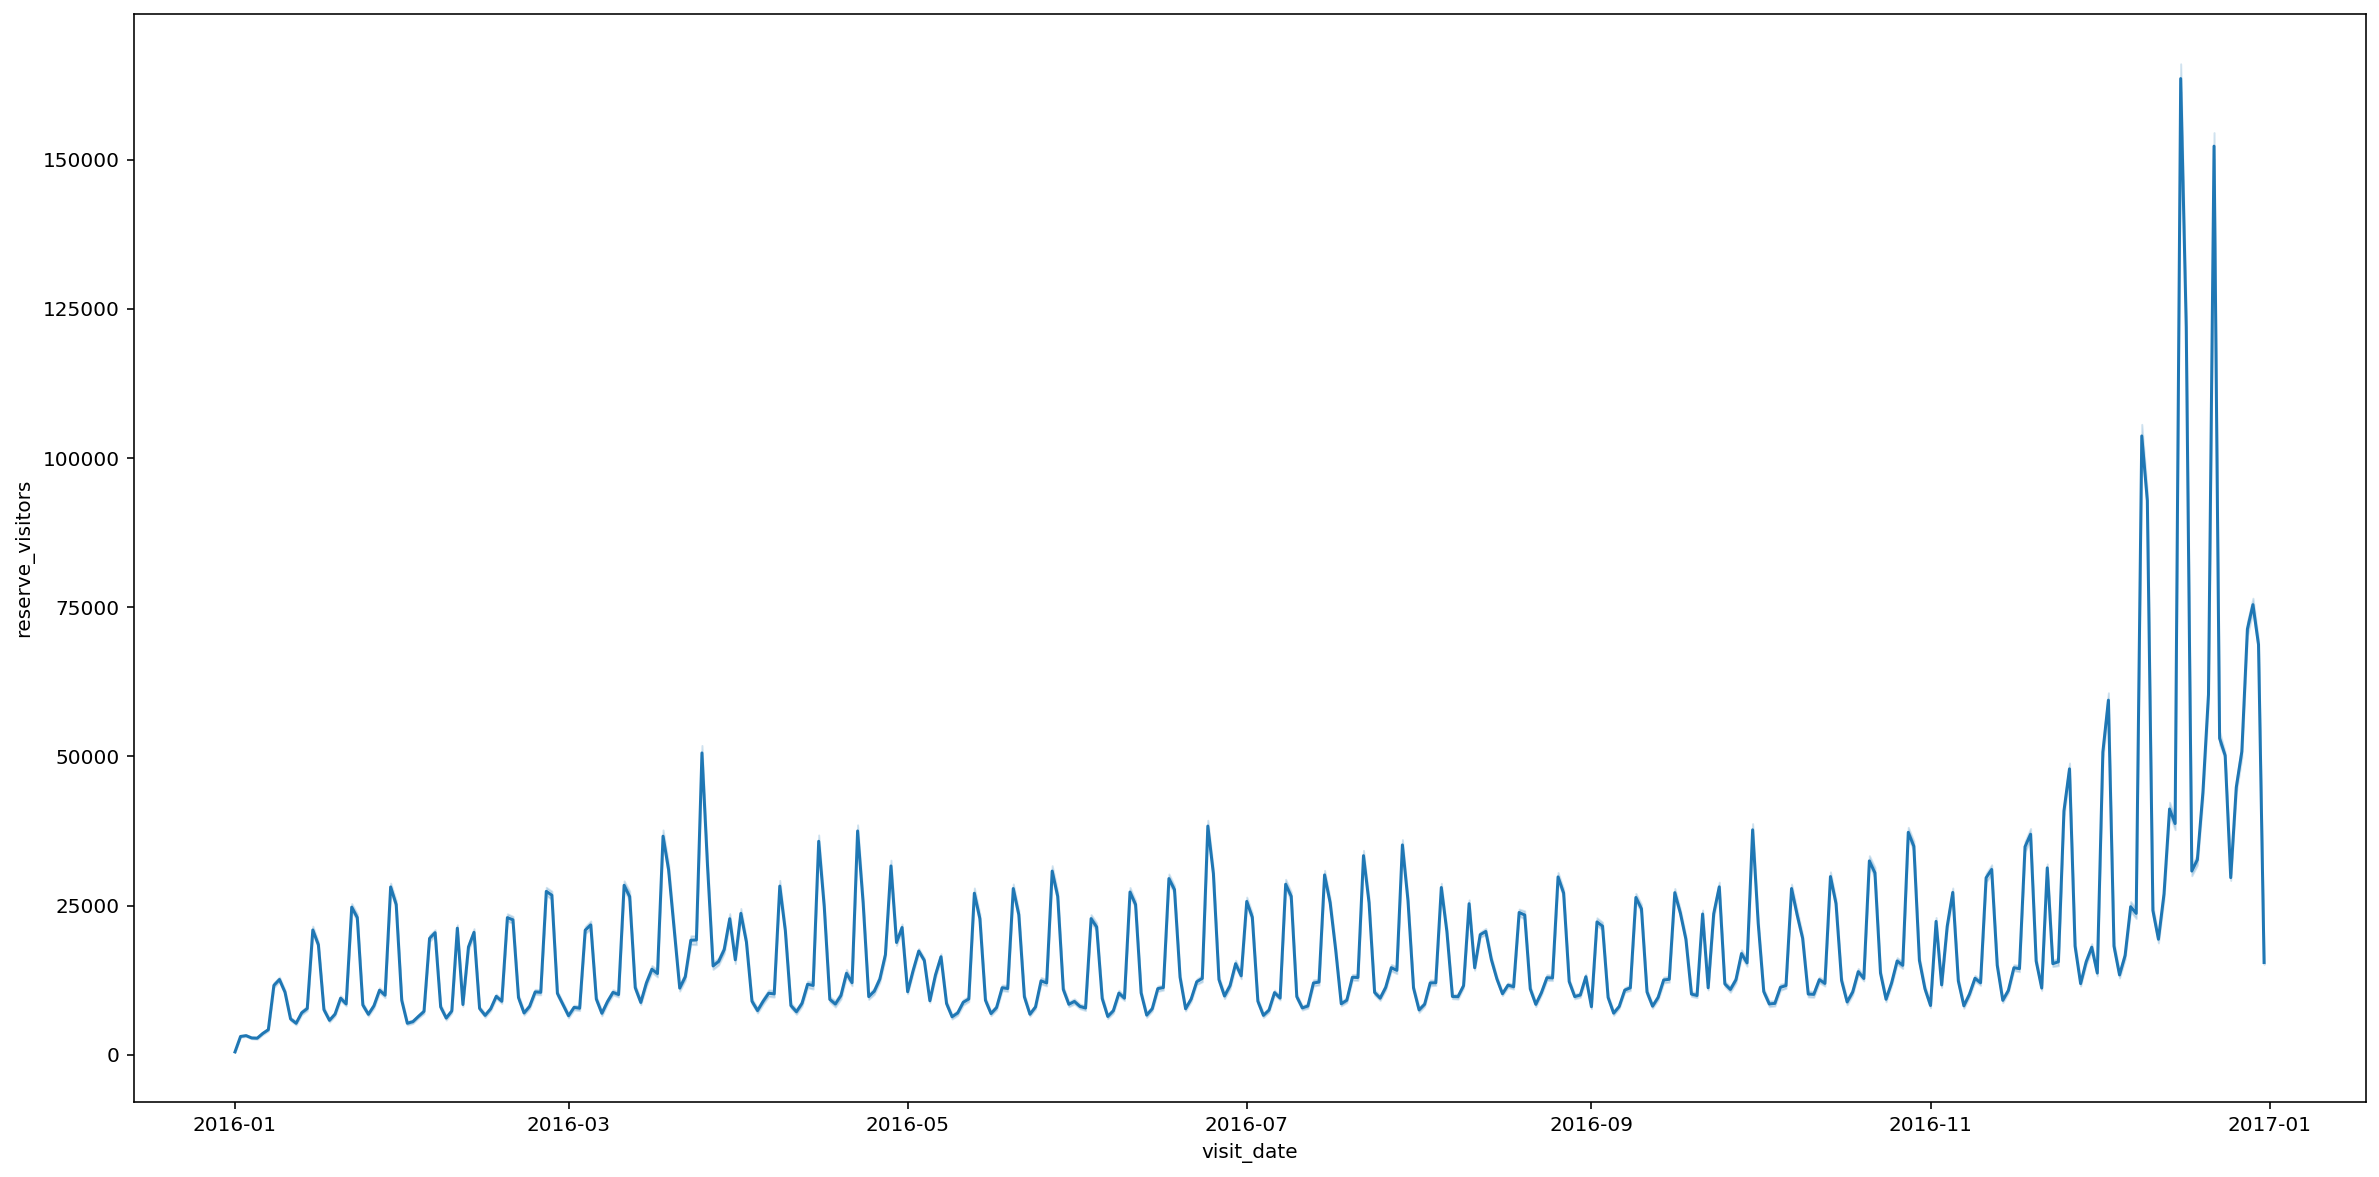

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(data = hpg_reserve_df[hpg_reserve_df.visit_year==2016], x='visit_date', y='reserve_visitors', estimator=sum)
plt.show()

# 2016년도 실제 방문자와 air+hgb 사이트의 예약자 비교

#### hpg와 air 사이트 두 곳 모두 있는 store을 하나로 합치는 과정

In [112]:
hpg_air_relation_df = pd.merge(data['hpg_reserve'], data['store_id_relation'], on='hpg_store_id')
hpg_air_relation_df

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,air_db80363d35f10926
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,air_db80363d35f10926
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,air_db80363d35f10926
...,...,...,...,...,...
28178,hpg_0f78ef8d1e4b23d8,2017-04-01 21:00:00,2017-03-10 20:00:00,2,air_84f6876ff7e83ae7
28179,hpg_0f78ef8d1e4b23d8,2017-04-02 17:00:00,2017-04-02 14:00:00,2,air_84f6876ff7e83ae7
28180,hpg_0f78ef8d1e4b23d8,2017-04-08 19:00:00,2017-04-03 12:00:00,3,air_84f6876ff7e83ae7
28181,hpg_0f78ef8d1e4b23d8,2017-04-08 20:00:00,2017-03-09 07:00:00,4,air_84f6876ff7e83ae7


air_reserve와 합치기 전 중복된 air_store_id가 있는지 체크해보았다.

In [126]:
uniques = pd.unique(hpg_air_relation_df['air_store_id'])
[x for x in uniques if x in data['air_reserve']['air_store_id']]

[]

중복되는게 없으므로 두 사이트의 예약 정보를 합쳤다.

In [118]:
hpg_air_relation_df = hpg_air_relation_df[['air_store_id', 'visit_datetime', 'reserve_datetime', 'reserve_visitors']]
hpg_air_relation_df = split_date_time(hpg_air_relation_df)
hpg_air_relation_df.loc[:,'visit_date'] = pd.to_datetime(hpg_air_relation_df['visit_date'])
hpg_air_relation_df['visit_year'] = pd.Series(hpg_air_relation_df.visit_date.dt.year)
hpg_air_relation_df['visit_month']  = pd.Series(hpg_air_relation_df.visit_date.dt.month)
hpg_air_relation_df['visit_day'] = pd.Series(hpg_air_relation_df.visit_date.dt.day)
hpg_air_relation_df

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_time,reserve_date,reserve_time,calendar_date_x,day_of_week_x,holiday_flg_x,calendar_date_y,day_of_week_y,holiday_flg_y,visit_year,visit_month,visit_day
0,air_db80363d35f10926,2016-01-01 19:00:00,2016-01-01 15:00:00,4,2016-01-01,19:00:00,2016-01-01,15:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
1,air_08cb3c4ee6cd6a22,2016-01-01 19:00:00,2016-01-01 16:00:00,2,2016-01-01,19:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
2,air_08cb3c4ee6cd6a22,2016-01-02 19:00:00,2016-01-01 23:00:00,4,2016-01-02,19:00:00,2016-01-01,23:00:00,2016-01-02,Saturday,1,2016-01-01,Friday,1,2016,1,2
3,air_6b15edd1b4fbb96a,2016-01-02 17:00:00,2016-01-01 22:00:00,3,2016-01-02,17:00:00,2016-01-01,22:00:00,2016-01-02,Saturday,1,2016-01-01,Friday,1,2016,1,2
4,air_6b15edd1b4fbb96a,2016-01-02 18:00:00,2016-01-01 12:00:00,3,2016-01-02,18:00:00,2016-01-01,12:00:00,2016-01-02,Saturday,1,2016-01-01,Friday,1,2016,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28178,air_54ed43163b7596c4,2017-04-24 20:00:00,2017-04-22 12:00:00,2,2017-04-24,20:00:00,2017-04-22,12:00:00,2017-04-24,Monday,0,2017-04-22,Saturday,0,2017,4,24
28179,air_bb09595bab7d5cfb,2017-04-24 21:00:00,2017-04-22 21:00:00,2,2017-04-24,21:00:00,2017-04-22,21:00:00,2017-04-24,Monday,0,2017-04-22,Saturday,0,2017,4,24
28180,air_5acc13d655a6e8b2,2017-05-13 19:00:00,2017-04-22 22:00:00,12,2017-05-13,19:00:00,2017-04-22,22:00:00,2017-05-13,Saturday,0,2017-04-22,Saturday,0,2017,5,13
28181,air_32c61b620a766138,2017-05-01 18:00:00,2017-04-22 20:00:00,2,2017-05-01,18:00:00,2017-04-22,20:00:00,2017-05-01,Monday,0,2017-04-22,Saturday,0,2017,5,1


In [120]:
temp_sum = pd.concat([air_reserve_group, hpg_air_relation_df])
temp_sum

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_time,reserve_date,reserve_time,calendar_date_x,day_of_week_x,holiday_flg_x,calendar_date_y,day_of_week_y,holiday_flg_y,visit_year,visit_month,visit_day
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,19:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,19:00:00,2016-01-01,19:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,19:00:00,2016-01-01,19:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,20:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,20:00:00,2016-01-01,01:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28178,air_54ed43163b7596c4,2017-04-24 20:00:00,2017-04-22 12:00:00,2,2017-04-24,20:00:00,2017-04-22,12:00:00,2017-04-24,Monday,0,2017-04-22,Saturday,0,2017,4,24
28179,air_bb09595bab7d5cfb,2017-04-24 21:00:00,2017-04-22 21:00:00,2,2017-04-24,21:00:00,2017-04-22,21:00:00,2017-04-24,Monday,0,2017-04-22,Saturday,0,2017,4,24
28180,air_5acc13d655a6e8b2,2017-05-13 19:00:00,2017-04-22 22:00:00,12,2017-05-13,19:00:00,2017-04-22,22:00:00,2017-05-13,Saturday,0,2017-04-22,Saturday,0,2017,5,13
28181,air_32c61b620a766138,2017-05-01 18:00:00,2017-04-22 20:00:00,2,2017-05-01,18:00:00,2017-04-22,20:00:00,2017-05-01,Monday,0,2017-04-22,Saturday,0,2017,5,1


#### 실제 사용자와 예약 방문자 비교

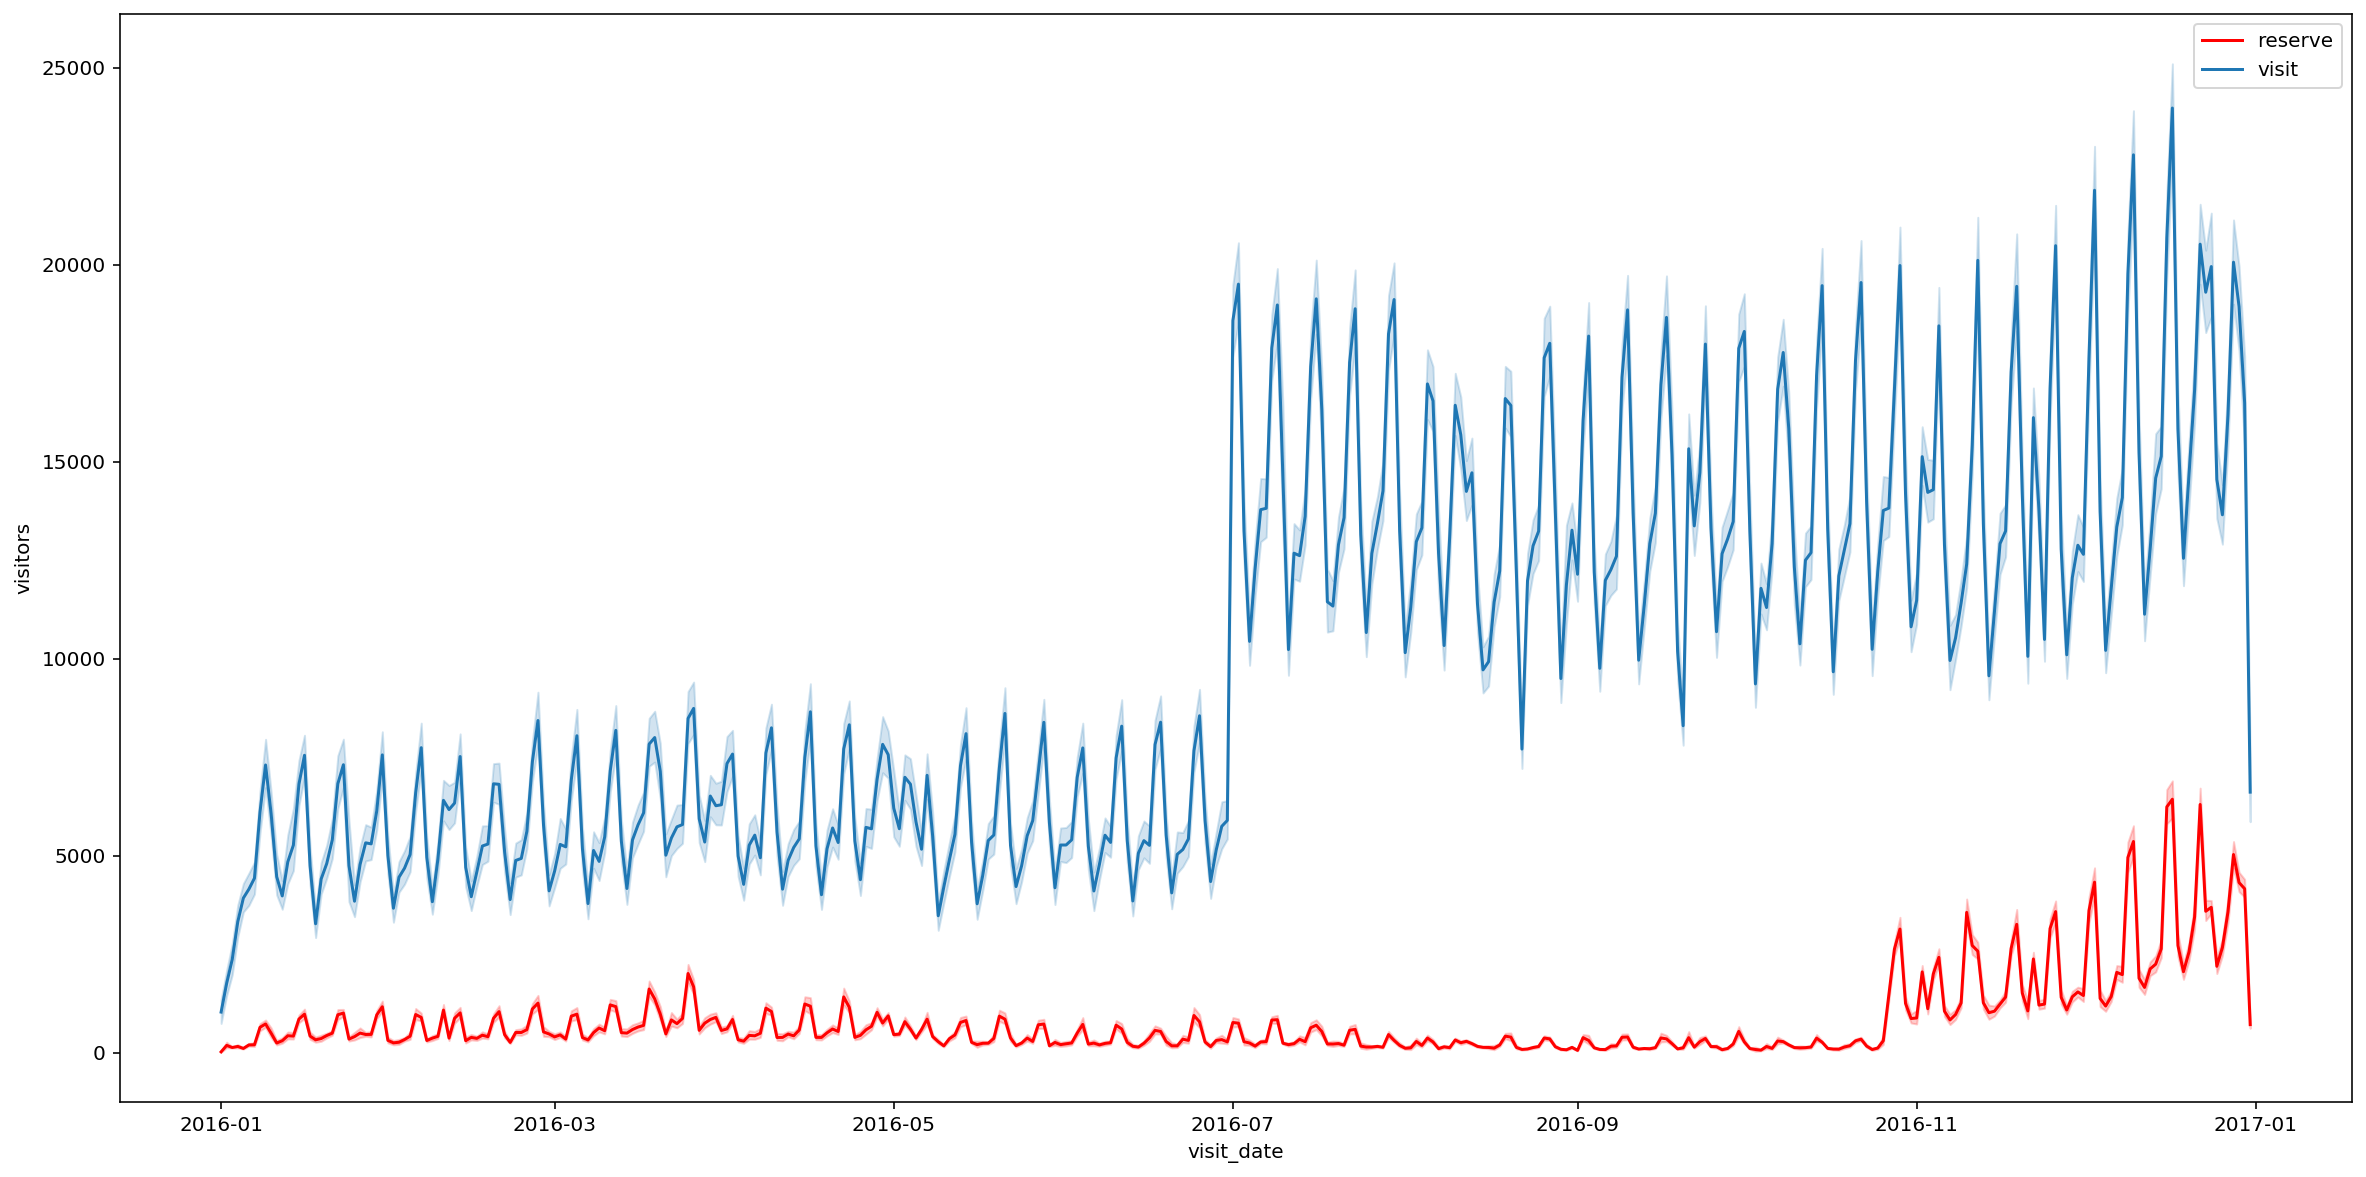

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(data = temp_sum[temp_sum.visit_year==2016], x='visit_date', y='reserve_visitors', estimator=sum, color='r')
sns.lineplot(data = air_visit_group[air_visit_group.visit_year==2016], x='visit_date', y='visitors', estimator=sum)
plt.legend(['reserve', 'visit'])
plt.show()

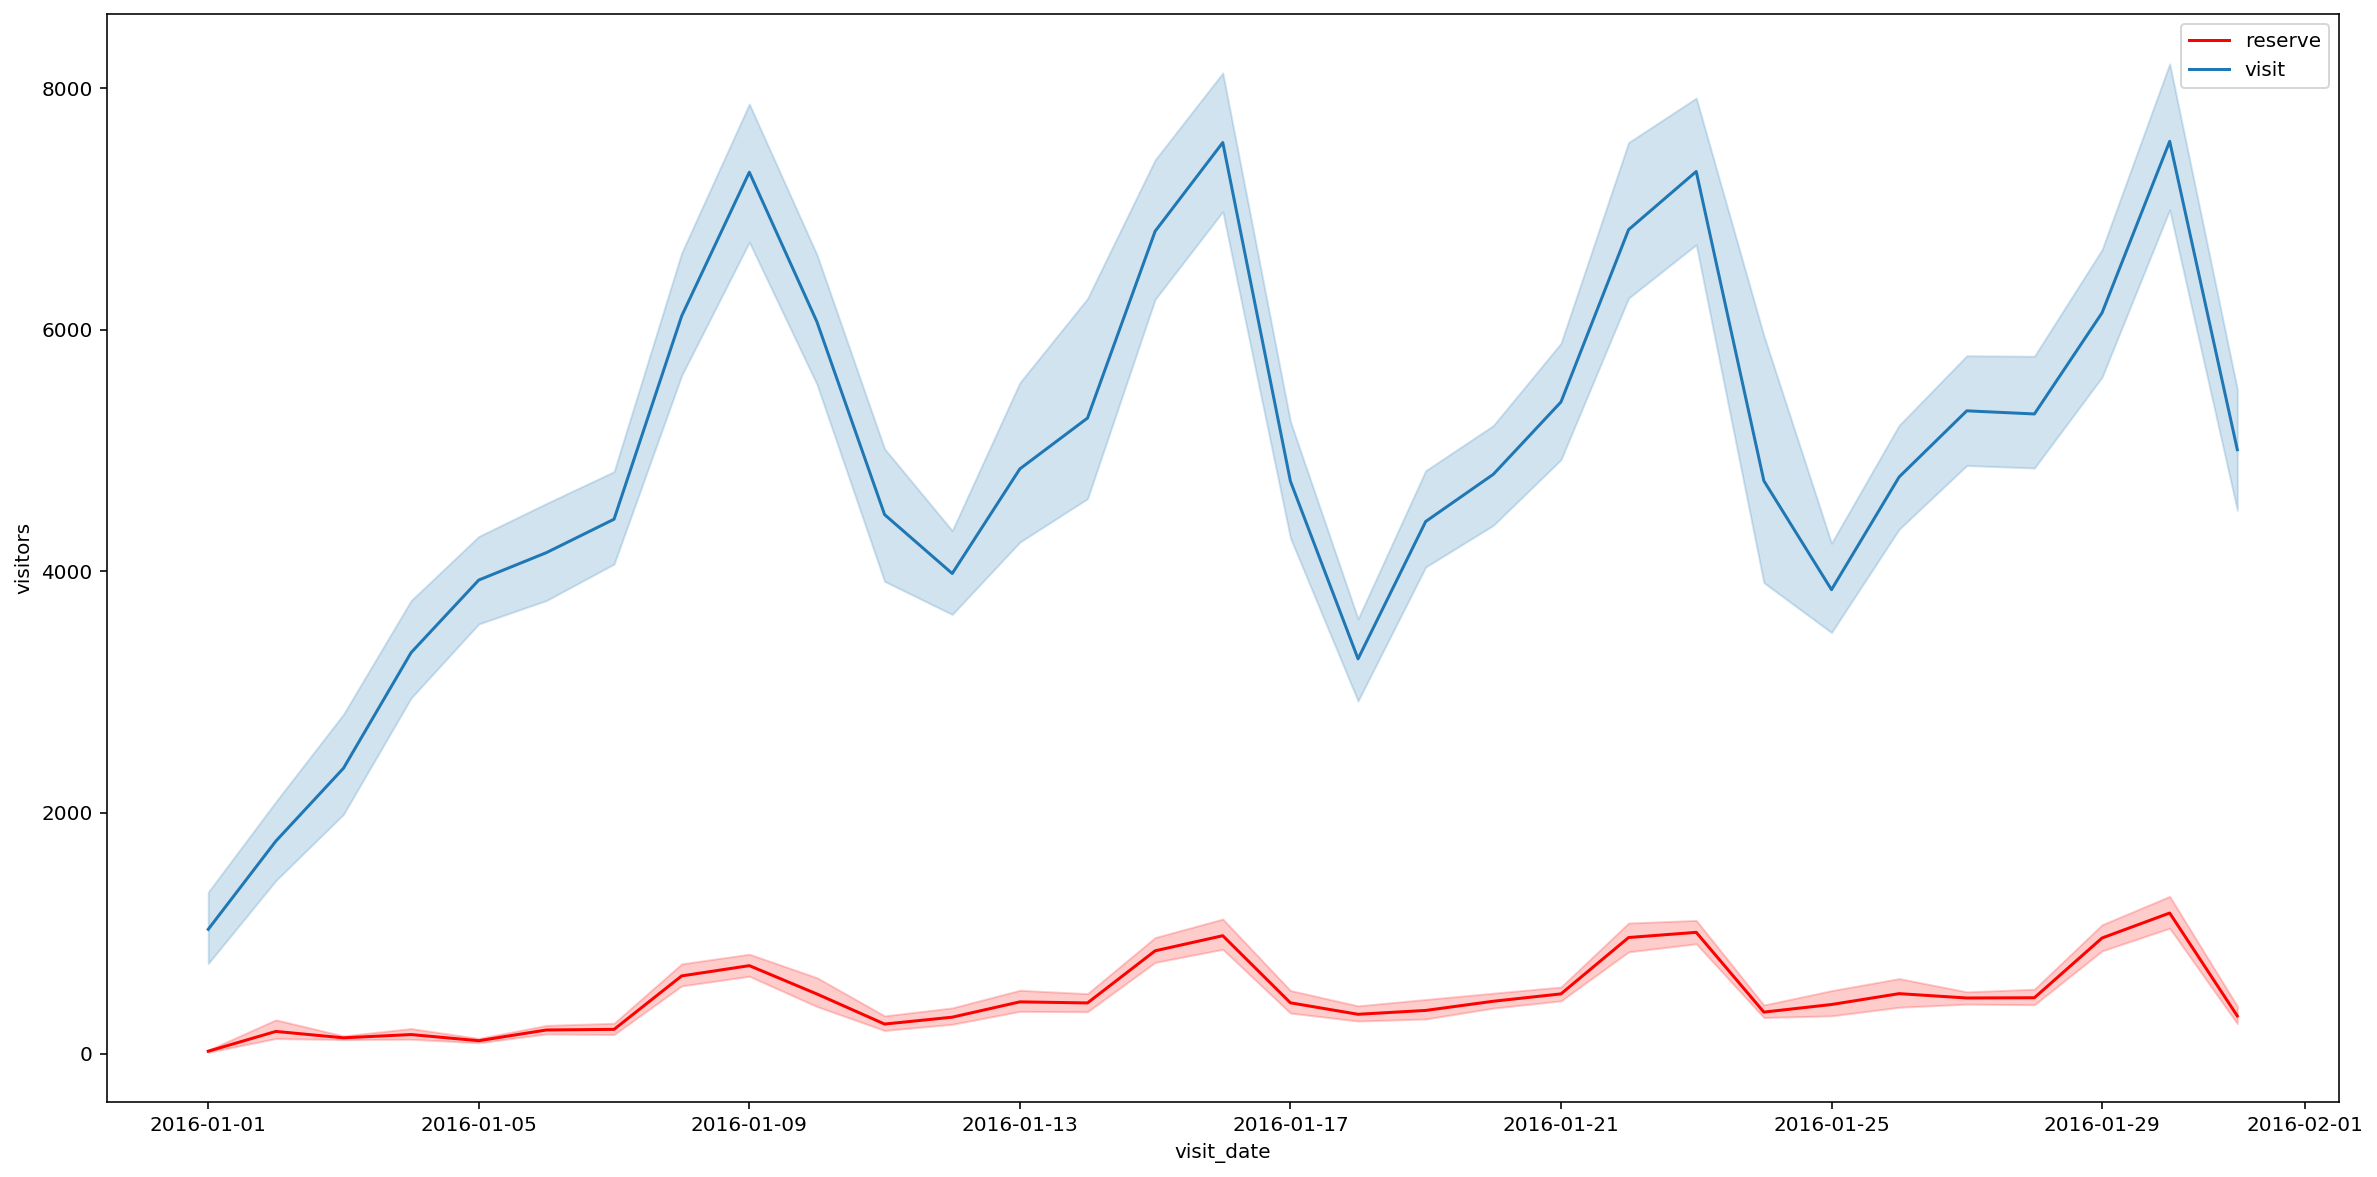

In [198]:
plt.figure(figsize=(20,10))
sns.lineplot(data = temp_sum.loc[(temp_sum['visit_year'] == 2016) & (temp_sum['visit_month'] == 1)], x='visit_date', y='reserve_visitors', estimator=sum, color='r')
sns.lineplot(data = air_visit_group.loc[(air_visit_group['visit_year'] == 2016) & (air_visit_group['visit_month'] == 1)], x='visit_date', y='visitors', estimator=sum)
plt.legend(['reserve', 'visit'])
plt.show()

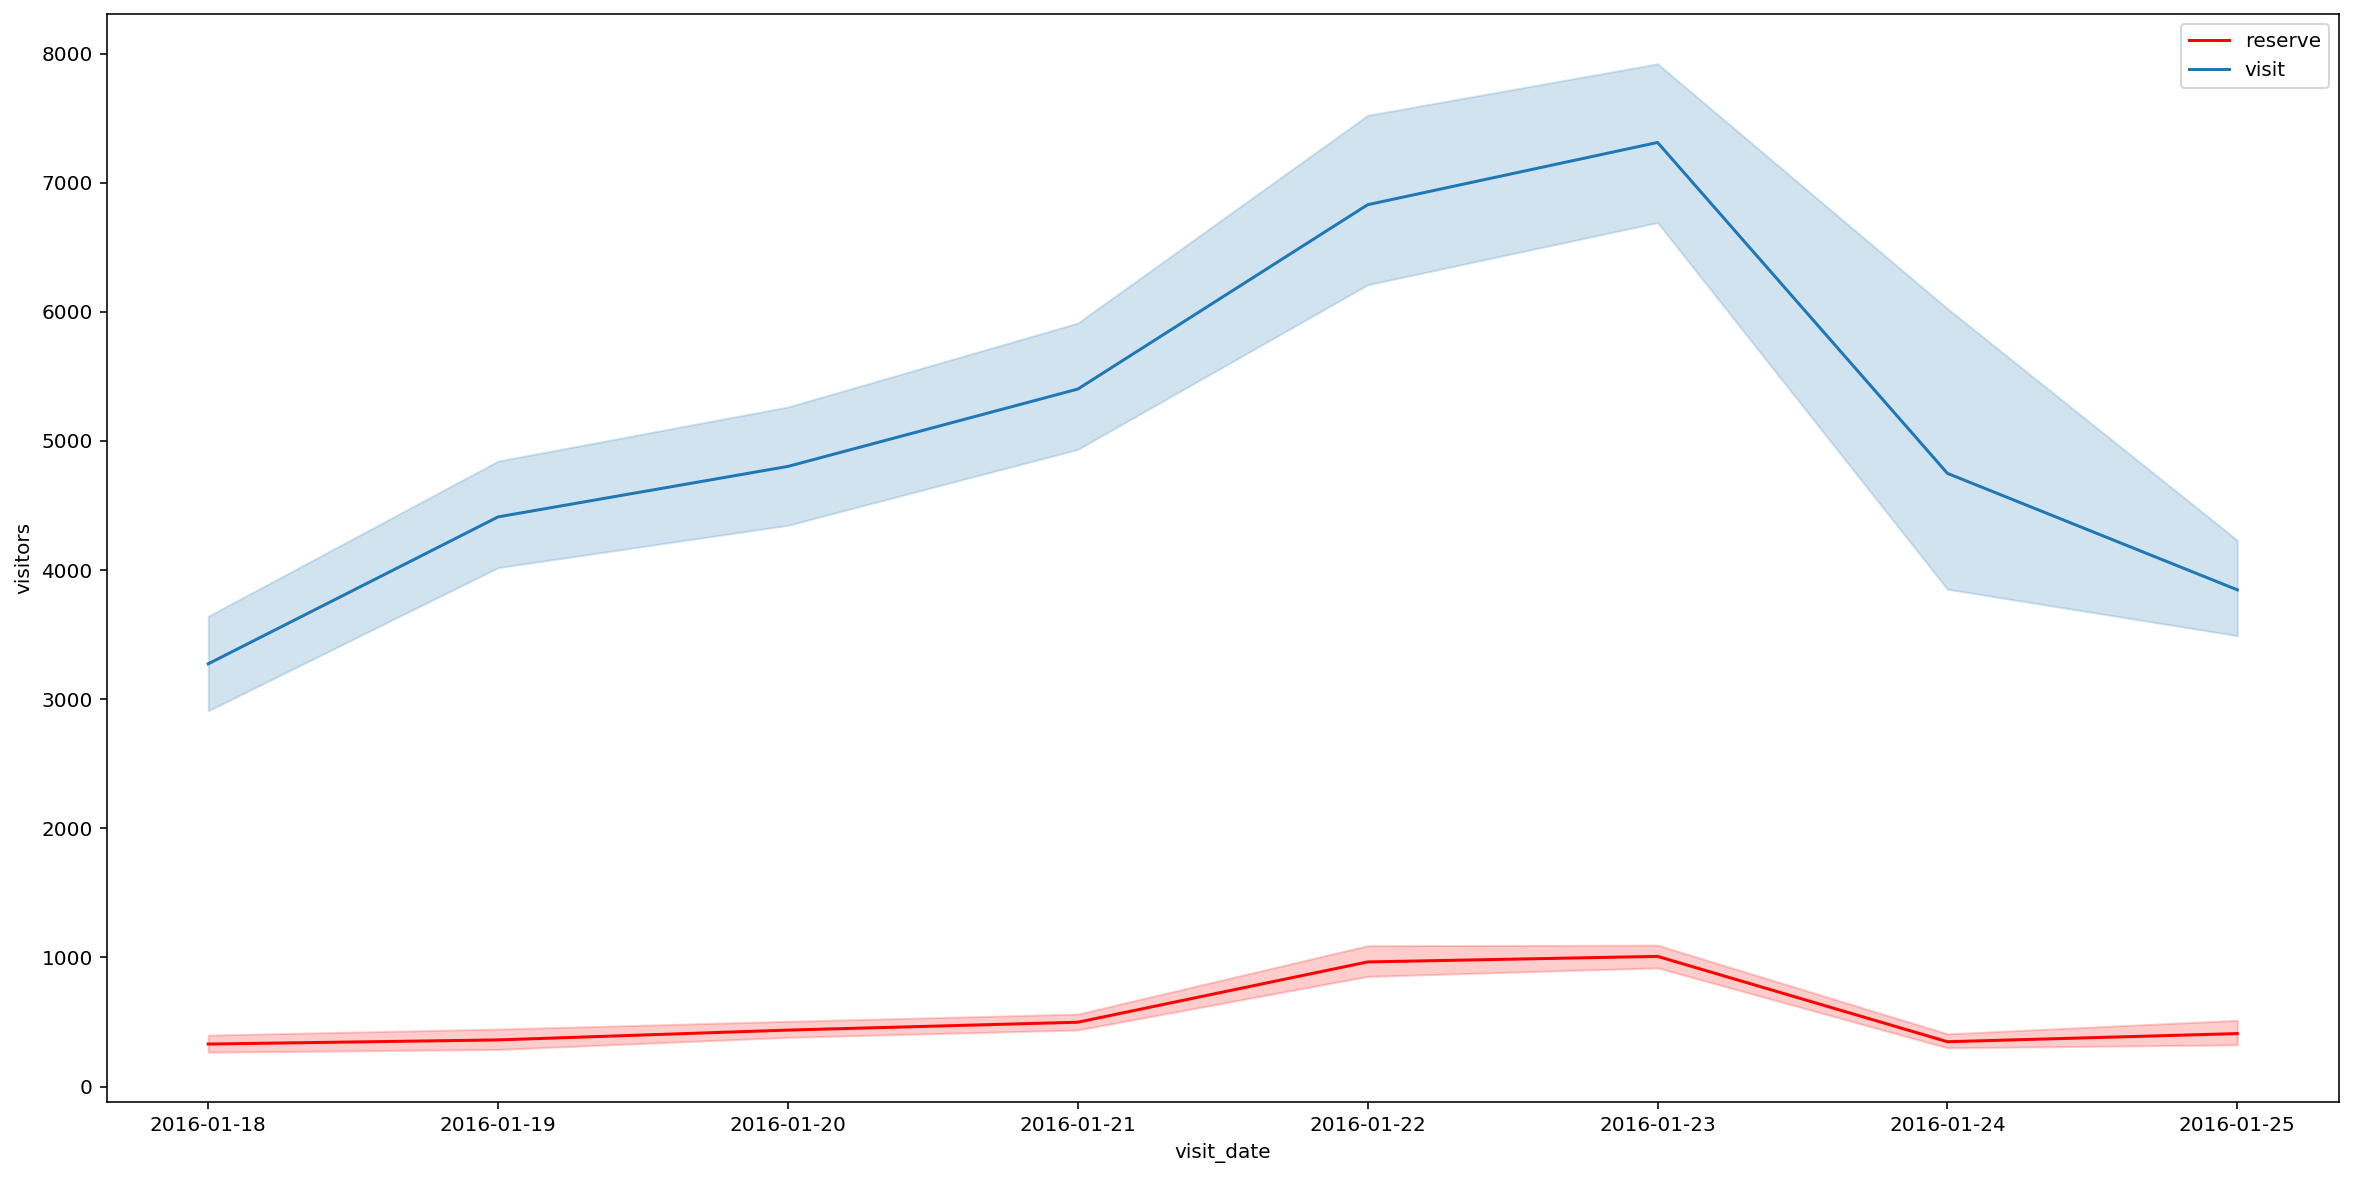

In [199]:
import datetime
start_date = list(air_visit_group[air_visit_group['day_of_week']=='Monday'].visit_date)[0]

plt.figure(figsize=(20,10))
sns.lineplot(data = temp_sum.loc[(temp_sum['visit_date'] >= start_date) 
                             & (temp_sum['visit_date'] <= start_date + datetime.timedelta(days=7))], x='visit_date', y='reserve_visitors', estimator=sum, color='r')
sns.lineplot(data = air_visit_group.loc[(air_visit_group['visit_date'] >= start_date) 
                             & (air_visit_group['visit_date'] <= start_date + datetime.timedelta(days=7))], x='visit_date', y='visitors', estimator=sum)
plt.legend(['reserve', 'visit'])
plt.show()

시각화 결과 예약율이 높아지면 방문율도 높아진다는 것을 알 수 있었다.

# 휴일과 예약율 간 관계 (air site에서)

In [239]:
air_reserve_group = split_date_time(data['air_reserve'])
air_reserve_group.loc[:,'visit_date'] = pd.to_datetime(air_reserve_group['visit_date'])
air_reserve_group['visit_year'] = pd.Series(air_reserve_group.visit_date.dt.year)
air_reserve_group['visit_month']  = pd.Series(air_reserve_group.visit_date.dt.month)
air_reserve_group['visit_day'] = pd.Series(air_reserve_group.visit_date.dt.day)
air_reserve_group.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_time,reserve_date,reserve_time,calendar_date_x,day_of_week_x,holiday_flg_x,calendar_date_y,day_of_week_y,holiday_flg_y,visit_year,visit_month,visit_day
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,19:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,19:00:00,2016-01-01,19:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,19:00:00,2016-01-01,19:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,20:00:00,2016-01-01,16:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,20:00:00,2016-01-01,01:00:00,2016-01-01,Friday,1,2016-01-01,Friday,1,2016,1,1


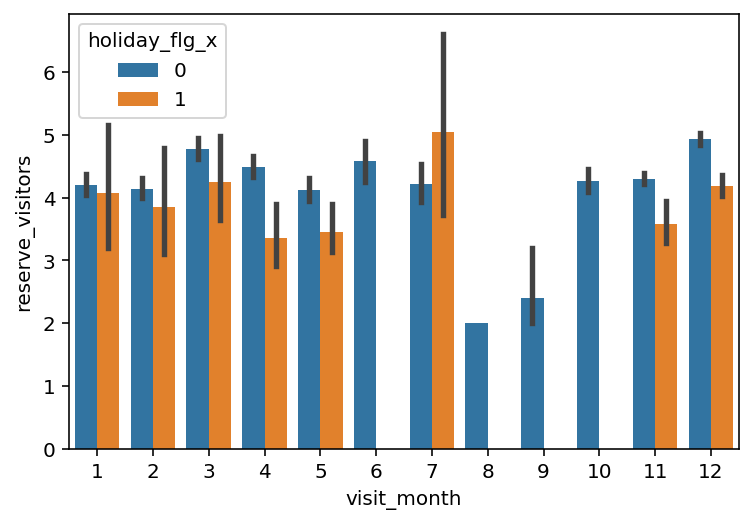

In [252]:
sns.barplot(data=air_reserve_group.loc[(air_reserve_group.visit_year==2016)], x='visit_month', y='reserve_visitors',hue='holiday_flg_x')

2016년도에는 휴일에 8,9,10월달에는 예약자가 없었고, 휴일에 7월에 평균 예약자가 많았다.

In [244]:
air_visit_df = split_date_time(data['air_visit_data'])
air_visit_df.loc[:,'visit_date'] = pd.to_datetime(air_visit_df['visit_date'])
air_visit_df['visit_year'] = pd.Series(air_visit_df.visit_date.dt.year)
air_visit_df['visit_month']  = pd.Series(air_visit_df.visit_date.dt.month)
air_visit_df['visit_day'] = pd.Series(air_visit_df.visit_date.dt.day)
air_visit_df.head()

,air_store_id,visit_date,visitors,calendar_date,day_of_week,holiday_flg,visit_year,visit_month,visit_day
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,2016,1,13
1,air_25e9888d30b386df,2016-01-13,21,2016-01-13,Wednesday,0,2016,1,13
2,air_fd6aac1043520e83,2016-01-13,40,2016-01-13,Wednesday,0,2016,1,13
3,air_64d4491ad8cdb1c6,2016-01-13,5,2016-01-13,Wednesday,0,2016,1,13
4,air_ee3a01f0c71a769f,2016-01-13,18,2016-01-13,Wednesday,0,2016,1,13


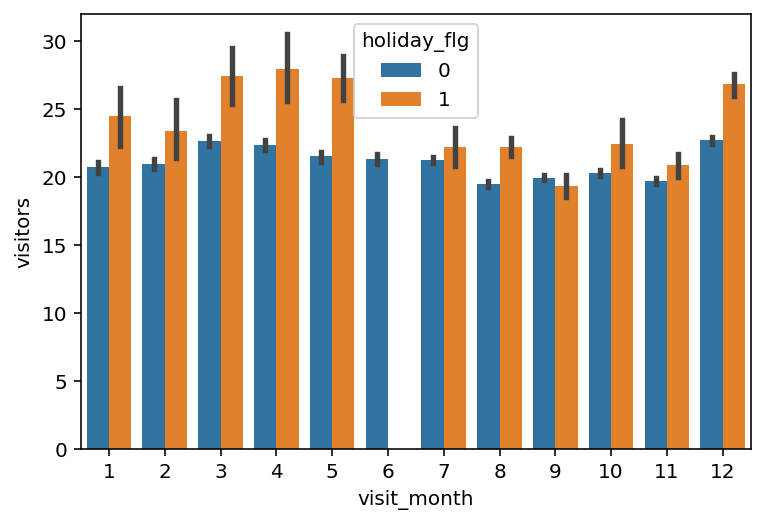

In [253]:
sns.barplot(data=air_visit_df.loc[(air_visit_df.visit_year==2016)], x='visit_month', y='visitors',hue='holiday_flg')

휴일에 방문자는 3,4,5월에 많았고,8~11월에는 대체적으로 방문자가 적었다.